Loaded 200 images and 200 masks from D:/1/Mohsin/ACDC/database/training.
Loaded 100 images and 100 masks from D:/1/Mohsin/ACDC/database/testing.


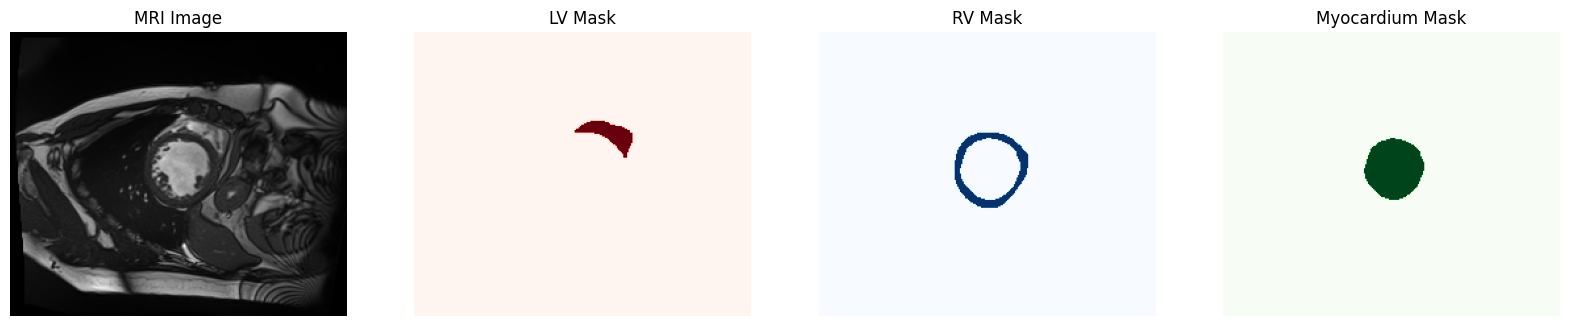

In [2]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
from torchvision import transforms as T

# Step 1: Load ACDC Data with Multi-Class Support
def load_acdc_data(data_path):
    """
    Load images and masks from the ACDC dataset.
    Args:
        data_path (str): Path to the dataset directory (training or testing).
    Returns:
        tuple: Two lists containing paths to images and masks.
    """
    images, masks = [], []

    for patient_folder in os.listdir(data_path):
        patient_path = os.path.join(data_path, patient_folder)
        if os.path.isdir(patient_path):
            for file in os.listdir(patient_path):
                if file.endswith('_gt.nii.gz'):  # Mask files
                    masks.append(os.path.join(patient_path, file))
                elif '_frame' in file and not file.endswith('_gt.nii.gz'):  # Image files
                    images.append(os.path.join(patient_path, file))

    images.sort()
    masks.sort()

    if len(images) != len(masks):
        raise ValueError(f"Mismatch in counts: {len(images)} images and {len(masks)} masks.")

    print(f"Loaded {len(images)} images and {len(masks)} masks from {data_path}.")
    return images, masks

# Paths
train_data_path = "D:/1/Mohsin/ACDC/database/training"
test_data_path = "D:/1/Mohsin/ACDC/database/testing"

# Load data
train_images, train_masks = load_acdc_data(train_data_path)
test_images, test_masks = load_acdc_data(test_data_path)

# Step 2: Visualize LV, RV, and Myocardium

def visualize_sample(image_path, mask_path):
    """
    Visualize the middle slice of an image and its multi-class mask (LV, RV, Myocardium).
    """
    image_nii = nib.load(image_path)
    mask_nii = nib.load(mask_path)

    image_data = image_nii.get_fdata()
    mask_data = mask_nii.get_fdata()

    middle_slice = image_data.shape[2] // 2

    # Extract classes from the mask
    lv_mask = (mask_data[:, :, middle_slice] == 1).astype(float)
    rv_mask = (mask_data[:, :, middle_slice] == 2).astype(float)
    myo_mask = (mask_data[:, :, middle_slice] == 3).astype(float)

    plt.figure(figsize=(20, 5))
    
    # MRI Image
    plt.subplot(1, 4, 1)
    plt.imshow(image_data[:, :, middle_slice], cmap="gray")
    plt.title("MRI Image")
    plt.axis("off")

    # LV Mask
    plt.subplot(1, 4, 2)
    plt.imshow(lv_mask, cmap="Reds")
    plt.title("LV Mask")
    plt.axis("off")

    # RV Mask
    plt.subplot(1, 4, 3)
    plt.imshow(rv_mask, cmap="Blues")
    plt.title("RV Mask")
    plt.axis("off")

    # Myocardium Mask
    plt.subplot(1, 4, 4)
    plt.imshow(myo_mask, cmap="Greens")
    plt.title("Myocardium Mask")
    plt.axis("off")

    plt.show()

# Visualize a training sample
visualize_sample(train_images[0], train_masks[0])


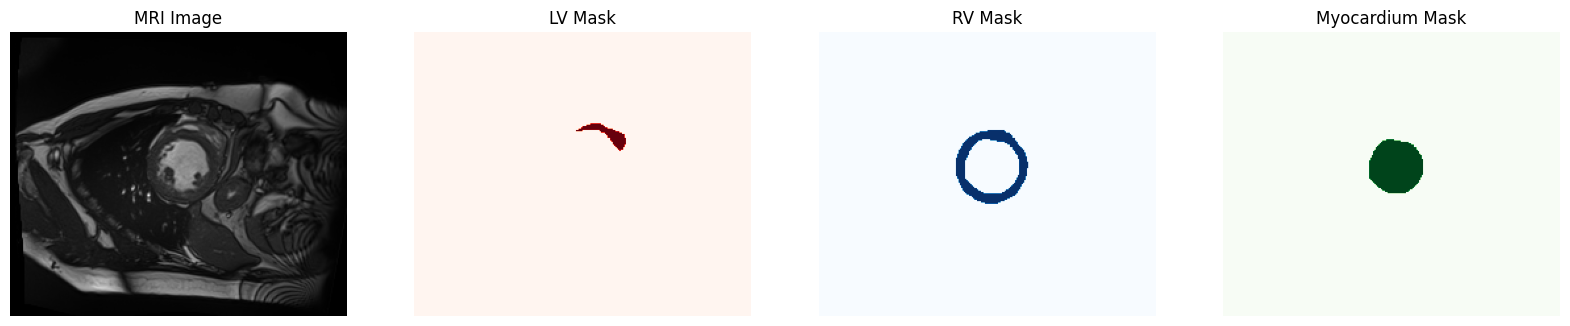

In [3]:
visualize_sample(train_images[1], train_masks[1])


Loaded 200 images and 200 masks from D:/1/Mohsin/ACDC/database/training.
Loaded 100 images and 100 masks from D:/1/Mohsin/ACDC/database/testing.


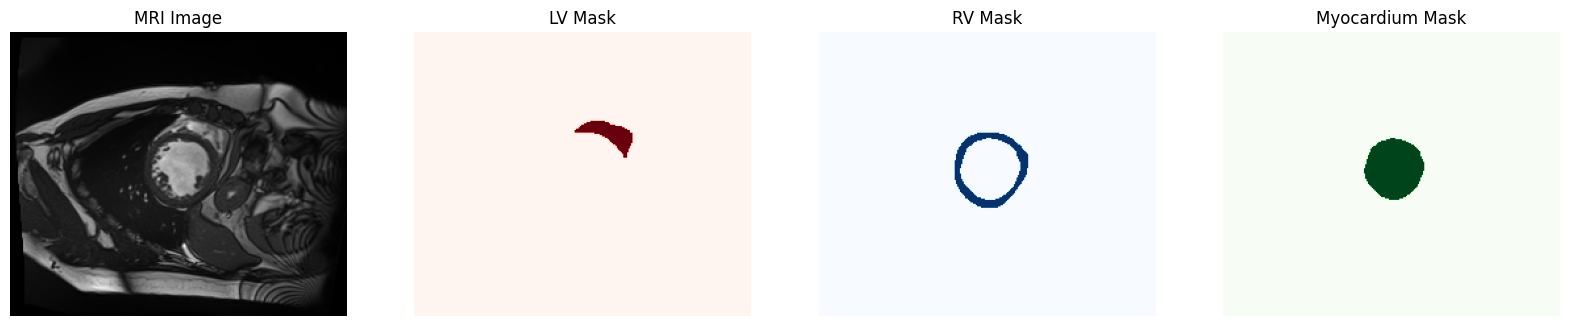

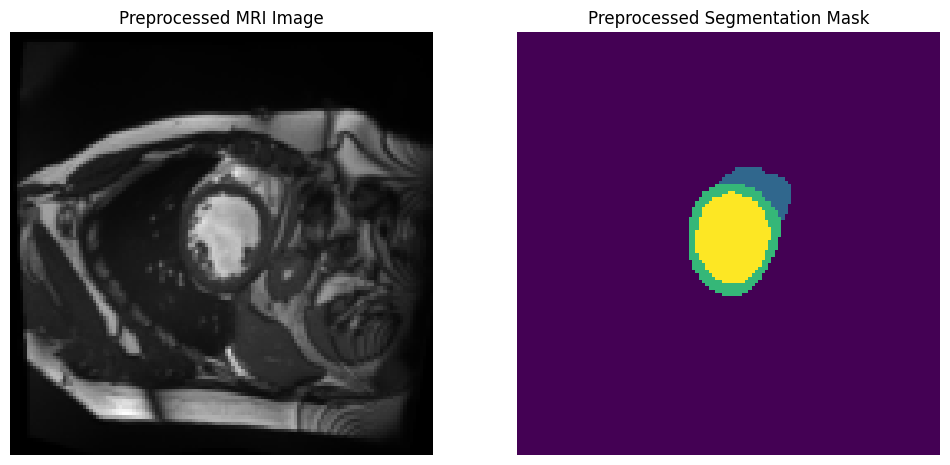

In [4]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
from torchvision import transforms as T

# Step 1: Load ACDC Data with Multi-Class Support
def load_acdc_data(data_path):
    """
    Load images and masks from the ACDC dataset.
    Args:
        data_path (str): Path to the dataset directory (training or testing).
    Returns:
        tuple: Two lists containing paths to images and masks.
    """
    images, masks = [], []

    for patient_folder in os.listdir(data_path):
        patient_path = os.path.join(data_path, patient_folder)
        if os.path.isdir(patient_path):
            for file in os.listdir(patient_path):
                if file.endswith('_gt.nii.gz'):  # Mask files
                    masks.append(os.path.join(patient_path, file))
                elif '_frame' in file and not file.endswith('_gt.nii.gz'):  # Image files
                    images.append(os.path.join(patient_path, file))

    images.sort()
    masks.sort()

    if len(images) != len(masks):
        raise ValueError(f"Mismatch in counts: {len(images)} images and {len(masks)} masks.")

    print(f"Loaded {len(images)} images and {len(masks)} masks from {data_path}.")
    return images, masks

# Paths
train_data_path = "D:/1/Mohsin/ACDC/database/training"
test_data_path = "D:/1/Mohsin/ACDC/database/testing"

# Load data
train_images, train_masks = load_acdc_data(train_data_path)
test_images, test_masks = load_acdc_data(test_data_path)

# Step 2: Visualize LV, RV, and Myocardium

def visualize_sample(image_path, mask_path):
    """
    Visualize the middle slice of an image and its multi-class mask (LV, RV, Myocardium).
    """
    image_nii = nib.load(image_path)
    mask_nii = nib.load(mask_path)

    image_data = image_nii.get_fdata()
    mask_data = mask_nii.get_fdata()

    middle_slice = image_data.shape[2] // 2

    # Extract classes from the mask
    lv_mask = (mask_data[:, :, middle_slice] == 1).astype(float)
    rv_mask = (mask_data[:, :, middle_slice] == 2).astype(float)
    myo_mask = (mask_data[:, :, middle_slice] == 3).astype(float)

    plt.figure(figsize=(20, 5))
    
    # MRI Image
    plt.subplot(1, 4, 1)
    plt.imshow(image_data[:, :, middle_slice], cmap="gray")
    plt.title("MRI Image")
    plt.axis("off")

    # LV Mask
    plt.subplot(1, 4, 2)
    plt.imshow(lv_mask, cmap="Reds")
    plt.title("LV Mask")
    plt.axis("off")

    # RV Mask
    plt.subplot(1, 4, 3)
    plt.imshow(rv_mask, cmap="Blues")
    plt.title("RV Mask")
    plt.axis("off")

    # Myocardium Mask
    plt.subplot(1, 4, 4)
    plt.imshow(myo_mask, cmap="Greens")
    plt.title("Myocardium Mask")
    plt.axis("off")

    plt.show()

# Visualize a training sample
visualize_sample(train_images[0], train_masks[0])

# Step 3: Data Preprocessing
def preprocess_data(image_path, mask_path, target_size=(128, 128)):
    """
    Preprocess the image and mask by resizing and normalizing.
    Args:
        image_path (str): Path to the MRI image.
        mask_path (str): Path to the segmentation mask.
        target_size (tuple): Target size for resizing (height, width).
    Returns:
        tuple: Preprocessed image and mask.
    """
    image_nii = nib.load(image_path)
    mask_nii = nib.load(mask_path)

    image_data = image_nii.get_fdata()
    mask_data = mask_nii.get_fdata()

    middle_slice = image_data.shape[2] // 2

    image_slice = image_data[:, :, middle_slice]
    mask_slice = mask_data[:, :, middle_slice]

    # Normalize image
    image_slice = (image_slice - np.min(image_slice)) / (np.max(image_slice) - np.min(image_slice))

    # Resize image and mask
    image_resized = T.functional.resize(torch.tensor(image_slice).unsqueeze(0), target_size)
    mask_resized = T.functional.resize(torch.tensor(mask_slice).unsqueeze(0), target_size, interpolation=T.InterpolationMode.NEAREST)

    return image_resized.squeeze(0).numpy(), mask_resized.squeeze(0).numpy()

# Preprocess a sample
preprocessed_image, preprocessed_mask = preprocess_data(train_images[0], train_masks[0])

# Step 4: Visualize Preprocessed Data
plt.figure(figsize=(12, 6))

# Preprocessed Image
plt.subplot(1, 2, 1)
plt.imshow(preprocessed_image, cmap="gray")
plt.title("Preprocessed MRI Image")
plt.axis("off")

# Preprocessed Mask
plt.subplot(1, 2, 2)
plt.imshow(preprocessed_mask, cmap="viridis")
plt.title("Preprocessed Segmentation Mask")
plt.axis("off")

plt.show()

Loaded 200 images and 200 masks from D:/1/Mohsin/ACDC/database/training.
Loaded 100 images and 100 masks from D:/1/Mohsin/ACDC/database/testing.


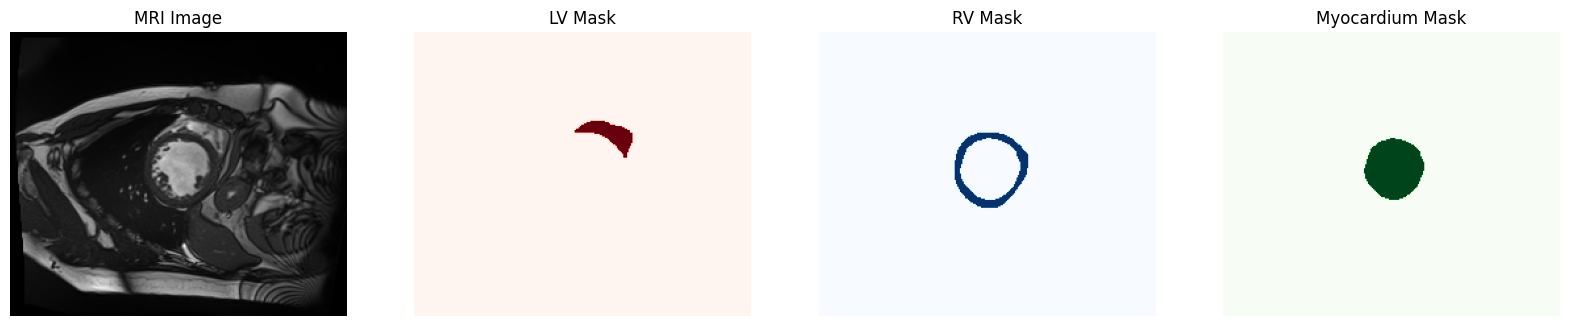

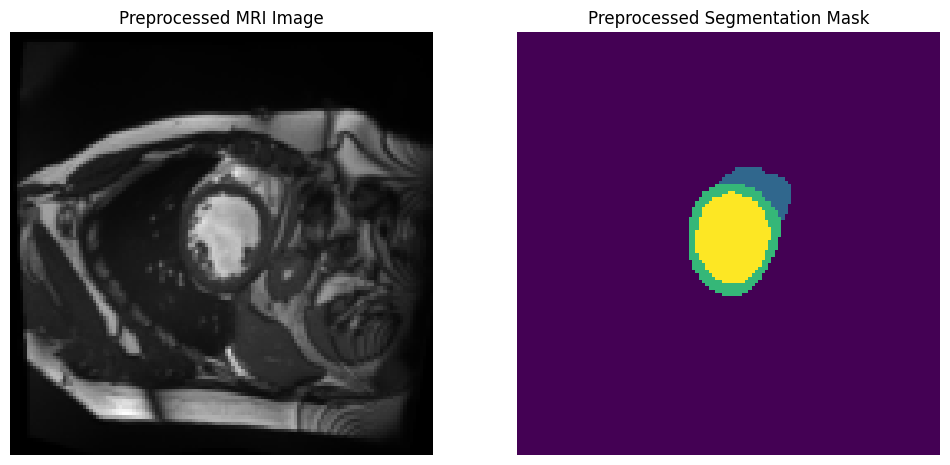

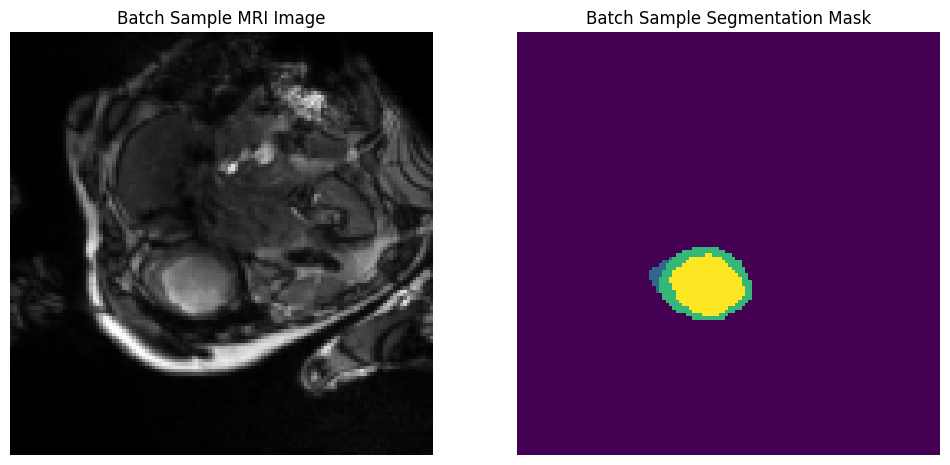

In [5]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
from torchvision import transforms as T

# Step 1: Load ACDC Data with Multi-Class Support
def load_acdc_data(data_path):
    """
    Load images and masks from the ACDC dataset.
    Args:
        data_path (str): Path to the dataset directory (training or testing).
    Returns:
        tuple: Two lists containing paths to images and masks.
    """
    images, masks = [], []

    for patient_folder in os.listdir(data_path):
        patient_path = os.path.join(data_path, patient_folder)
        if os.path.isdir(patient_path):
            for file in os.listdir(patient_path):
                if file.endswith('_gt.nii.gz'):  # Mask files
                    masks.append(os.path.join(patient_path, file))
                elif '_frame' in file and not file.endswith('_gt.nii.gz'):  # Image files
                    images.append(os.path.join(patient_path, file))

    images.sort()
    masks.sort()

    if len(images) != len(masks):
        raise ValueError(f"Mismatch in counts: {len(images)} images and {len(masks)} masks.")

    print(f"Loaded {len(images)} images and {len(masks)} masks from {data_path}.")
    return images, masks

# Paths
train_data_path = "D:/1/Mohsin/ACDC/database/training"
test_data_path = "D:/1/Mohsin/ACDC/database/testing"

# Load data
train_images, train_masks = load_acdc_data(train_data_path)
test_images, test_masks = load_acdc_data(test_data_path)

# Step 2: Visualize LV, RV, and Myocardium

def visualize_sample(image_path, mask_path):
    """
    Visualize the middle slice of an image and its multi-class mask (LV, RV, Myocardium).
    """
    image_nii = nib.load(image_path)
    mask_nii = nib.load(mask_path)

    image_data = image_nii.get_fdata()
    mask_data = mask_nii.get_fdata()

    middle_slice = image_data.shape[2] // 2

    # Extract classes from the mask
    lv_mask = (mask_data[:, :, middle_slice] == 1).astype(float)
    rv_mask = (mask_data[:, :, middle_slice] == 2).astype(float)
    myo_mask = (mask_data[:, :, middle_slice] == 3).astype(float)

    plt.figure(figsize=(20, 5))
    
    # MRI Image
    plt.subplot(1, 4, 1)
    plt.imshow(image_data[:, :, middle_slice], cmap="gray")
    plt.title("MRI Image")
    plt.axis("off")

    # LV Mask
    plt.subplot(1, 4, 2)
    plt.imshow(lv_mask, cmap="Reds")
    plt.title("LV Mask")
    plt.axis("off")

    # RV Mask
    plt.subplot(1, 4, 3)
    plt.imshow(rv_mask, cmap="Blues")
    plt.title("RV Mask")
    plt.axis("off")

    # Myocardium Mask
    plt.subplot(1, 4, 4)
    plt.imshow(myo_mask, cmap="Greens")
    plt.title("Myocardium Mask")
    plt.axis("off")

    plt.show()

# Visualize a training sample
visualize_sample(train_images[0], train_masks[0])

# Step 3: Data Preprocessing
def preprocess_data(image_path, mask_path, target_size=(128, 128)):
    """
    Preprocess the image and mask by resizing and normalizing.
    Args:
        image_path (str): Path to the MRI image.
        mask_path (str): Path to the segmentation mask.
        target_size (tuple): Target size for resizing (height, width).
    Returns:
        tuple: Preprocessed image and mask.
    """
    image_nii = nib.load(image_path)
    mask_nii = nib.load(mask_path)

    image_data = image_nii.get_fdata()
    mask_data = mask_nii.get_fdata()

    middle_slice = image_data.shape[2] // 2

    image_slice = image_data[:, :, middle_slice]
    mask_slice = mask_data[:, :, middle_slice]

    # Normalize image
    image_slice = (image_slice - np.min(image_slice)) / (np.max(image_slice) - np.min(image_slice))

    # Resize image and mask
    image_resized = T.functional.resize(torch.tensor(image_slice).unsqueeze(0), target_size)
    mask_resized = T.functional.resize(torch.tensor(mask_slice).unsqueeze(0), target_size, interpolation=T.InterpolationMode.NEAREST)

    return image_resized.squeeze(0).numpy(), mask_resized.squeeze(0).numpy()

# Preprocess a sample
preprocessed_image, preprocessed_mask = preprocess_data(train_images[0], train_masks[0])

# Step 4: Visualize Preprocessed Data
plt.figure(figsize=(12, 6))

# Preprocessed Image
plt.subplot(1, 2, 1)
plt.imshow(preprocessed_image, cmap="gray")
plt.title("Preprocessed MRI Image")
plt.axis("off")

# Preprocessed Mask
plt.subplot(1, 2, 2)
plt.imshow(preprocessed_mask, cmap="viridis")
plt.title("Preprocessed Segmentation Mask")
plt.axis("off")

plt.show()

# Step 5: Dataset and DataLoader Classes
class CardiacDataset(Dataset):
    def __init__(self, image_paths, mask_paths, target_size=(128, 128)):
        self.image_paths = image_paths
        self.mask_paths = mask_paths
        self.target_size = target_size

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        mask_path = self.mask_paths[idx]
        
        image, mask = preprocess_data(image_path, mask_path, self.target_size)

        # Convert to tensors
        image_tensor = torch.tensor(image, dtype=torch.float32).unsqueeze(0)  # Add channel dimension
        mask_tensor = torch.tensor(mask, dtype=torch.long)  # Masks as class indices

        return image_tensor, mask_tensor

# Create Dataset and DataLoader
train_dataset = CardiacDataset(train_images, train_masks)
test_dataset = CardiacDataset(test_images, test_masks)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Step 6: Visualize DataLoader Output
sample_image, sample_mask = next(iter(train_loader))

# Visualize one batch of data
plt.figure(figsize=(12, 6))

# First image in the batch
plt.subplot(1, 2, 1)
plt.imshow(sample_image[0, 0], cmap="gray")  # First channel of the first image
plt.title("Batch Sample MRI Image")
plt.axis("off")

# Corresponding mask
plt.subplot(1, 2, 2)
plt.imshow(sample_mask[0], cmap="viridis")
plt.title("Batch Sample Segmentation Mask")
plt.axis("off")

plt.show()


In [6]:
class UNet(nn.Module):
    def __init__(self, in_channels=1, out_channels=4):
        super(UNet, self).__init__()
        def conv_block(in_ch, out_ch):
            return nn.Sequential(
                nn.Conv2d(in_ch, out_ch, kernel_size=3, padding=1),
                nn.ReLU(inplace=True),
                nn.Conv2d(out_ch, out_ch, kernel_size=3, padding=1),
                nn.ReLU(inplace=True)
            )
        
        self.encoder1 = conv_block(in_channels, 64)
        self.encoder2 = conv_block(64, 128)
        self.encoder3 = conv_block(128, 256)
        self.encoder4 = conv_block(256, 512)
        
        self.pool = nn.MaxPool2d(2)
        self.bottleneck = conv_block(512, 1024)
        
        self.upconv4 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)
        self.decoder4 = conv_block(1024, 512)
        self.upconv3 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.decoder3 = conv_block(512, 256)
        self.upconv2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.decoder2 = conv_block(256, 128)
        self.upconv1 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.decoder1 = conv_block(128, 64)
        
        self.final_layer = nn.Conv2d(64, out_channels, kernel_size=1)
    
    def forward(self, x):
        enc1 = self.encoder1(x)
        enc2 = self.encoder2(self.pool(enc1))
        enc3 = self.encoder3(self.pool(enc2))
        enc4 = self.encoder4(self.pool(enc3))
        
        bottleneck = self.bottleneck(self.pool(enc4))
        
        dec4 = self.upconv4(bottleneck)
        dec4 = torch.cat((enc4, dec4), dim=1)
        dec4 = self.decoder4(dec4)
        
        dec3 = self.upconv3(dec4)
        dec3 = torch.cat((enc3, dec3), dim=1)
        dec3 = self.decoder3(dec3)
        
        dec2 = self.upconv2(dec3)
        dec2 = torch.cat((enc2, dec2), dim=1)
        dec2 = self.decoder2(dec2)
        
        dec1 = self.upconv1(dec2)
        dec1 = torch.cat((enc1, dec1), dim=1)
        dec1 = self.decoder1(dec1)
        
        return self.final_layer(dec1)

# Initialize model
model = UNet()
print(model)


UNet(
  (encoder1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (encoder2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (encoder3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (encoder4): Sequential(
    (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (pool): MaxPool2d(kernel_size=2, strid

In [7]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Multi-class segmentation
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)


In [8]:
# Training loop
def train_model(model, train_loader, criterion, optimizer, num_epochs=10, device='cpu'):
    model.to(device)
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, masks in train_loader:
            images, masks = images.to(device), masks.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, masks)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        
        epoch_loss = running_loss / len(train_loader)
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

# Train the model
train_model(model, train_loader, criterion, optimizer, num_epochs=5, device='cuda' if torch.cuda.is_available() else 'cpu')


Epoch 1/5, Loss: 1.2007
Epoch 2/5, Loss: 0.3317
Epoch 3/5, Loss: 0.2322
Epoch 4/5, Loss: 0.1953
Epoch 5/5, Loss: 0.1261


In [9]:
# # Training loop
# def train_model(model, train_loader, criterion, optimizer, num_epochs=10, device='cpu'):
#     model.to(device)
#     for epoch in range(num_epochs):
#         model.train()
#         running_loss = 0.0
#         for images, masks in train_loader:
#             images, masks = images.to(device), masks.to(device)

#             # Forward pass
#             outputs = model(images)
#             loss = criterion(outputs, masks)

#             # Backward pass and optimization
#             optimizer.zero_grad()
#             loss.backward()
#             optimizer.step()

#             running_loss += loss.item()
        
#         epoch_loss = running_loss / len(train_loader)
#         print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

# # Train the model
# train_model(model, train_loader, criterion, optimizer, num_epochs=5, device='cuda' if torch.cuda.is_available() else 'cpu')


Epoch 1/10, Train Loss: 0.1153, Val Loss: 0.1008, Val Accuracy: 96.13%
Epoch 2/10, Train Loss: 0.1091, Val Loss: 0.0958, Val Accuracy: 96.16%
Epoch 3/10, Train Loss: 0.1014, Val Loss: 0.0912, Val Accuracy: 96.94%
Epoch 4/10, Train Loss: 0.0961, Val Loss: 0.0849, Val Accuracy: 97.02%
Epoch 5/10, Train Loss: 0.0913, Val Loss: 0.0824, Val Accuracy: 96.88%
Epoch 6/10, Train Loss: 0.0886, Val Loss: 0.0838, Val Accuracy: 97.11%
Epoch 7/10, Train Loss: 0.0852, Val Loss: 0.0784, Val Accuracy: 97.20%
Epoch 8/10, Train Loss: 0.0822, Val Loss: 0.0747, Val Accuracy: 97.33%
Epoch 9/10, Train Loss: 0.0785, Val Loss: 0.0779, Val Accuracy: 97.22%
Epoch 10/10, Train Loss: 0.0760, Val Loss: 0.0710, Val Accuracy: 97.43%


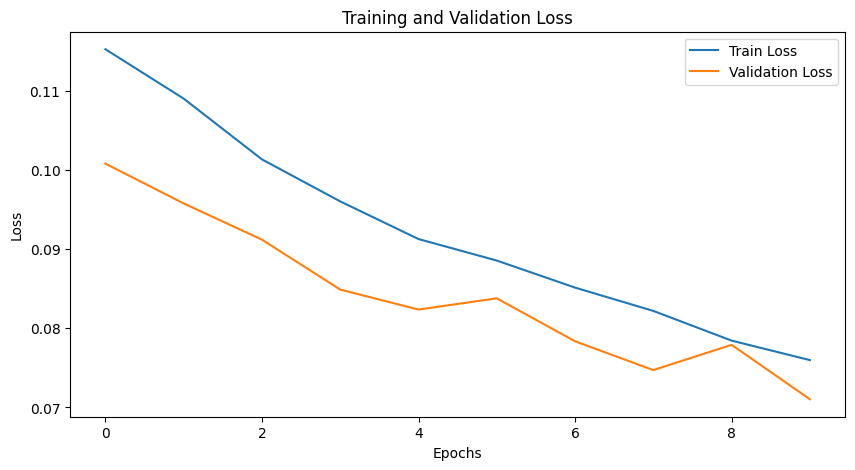

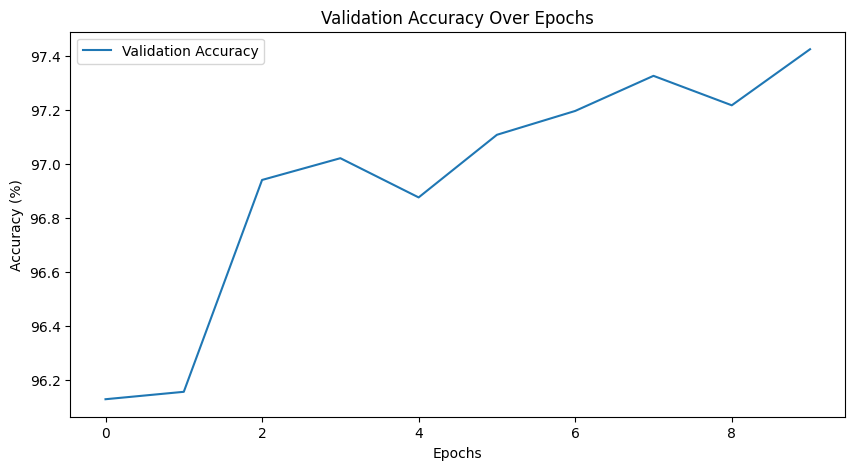

In [10]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

# Validation function with accuracy calculation
def validate_model(model, val_loader, criterion, device='cpu'):
    model.eval()  # Set model to evaluation mode
    val_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    all_preds = []
    all_masks = []

    with torch.no_grad():
        for images, masks in val_loader:
            images, masks = images.to(device), masks.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, masks)
            val_loss += loss.item()

            # Get predictions
            preds = torch.argmax(outputs, dim=1)

            # Calculate accuracy
            correct_predictions += (preds == masks).sum().item()
            total_predictions += masks.numel()

            # Store predictions and ground truths
            all_preds.append(preds.cpu())
            all_masks.append(masks.cpu())
    
    val_loss /= len(val_loader)
    accuracy = (correct_predictions / total_predictions) * 100  # Convert to percentage
    return val_loss, accuracy, torch.cat(all_preds), torch.cat(all_masks)

# Train and validate with visualization
def train_and_validate(model, train_loader, val_loader, criterion, optimizer, num_epochs=10, device='cpu'):
    train_losses, val_losses, val_accuracies = [], [], []
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for images, masks in train_loader:
            images, masks = images.to(device), masks.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, masks)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        train_loss = running_loss / len(train_loader)
        val_loss, val_accuracy, _, _ = validate_model(model, val_loader, criterion, device)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)
        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%")
    
    # Plot training and validation losses
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label="Train Loss")
    plt.plot(val_losses, label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss")
    plt.legend()
    plt.show()

    # Plot validation accuracy over epochs
    plt.figure(figsize=(10, 5))
    plt.plot(val_accuracies, label="Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy (%)")
    plt.title("Validation Accuracy Over Epochs")
    plt.legend()
    plt.show()

# Split train dataset for validation
train_split, val_split = train_test_split(train_dataset, test_size=0.2, random_state=42)
train_loader = DataLoader(train_split, batch_size=8, shuffle=True)
val_loader = DataLoader(val_split, batch_size=8, shuffle=False)

# Train and validate the model
train_and_validate(model, train_loader, val_loader, criterion, optimizer, num_epochs=10, device='cuda' if torch.cuda.is_available() else 'cpu')


In [27]:
def test_model(model, test_loader, criterion, device='cpu'):
    model.eval()
    correct_predictions = 0
    total_predictions = 0
    all_preds, all_masks = [], []

    with torch.no_grad():
        for images, masks in test_loader:
            images, masks = images.to(device), masks.to(device)
            
            # Forward pass
            outputs = model(images)
            preds = torch.argmax(outputs, dim=1)

            # Calculate accuracy for the batch
            correct_predictions += (preds == masks).sum().item()
            total_predictions += masks.numel()

            all_preds.append(preds.cpu())
            all_masks.append(masks.cpu())

    accuracy = (correct_predictions / total_predictions) * 100  # Convert to percentage
    print(f"Test Accuracy: {accuracy:.2f}%")

    return torch.cat(all_preds), torch.cat(all_masks), accuracy


In [43]:
# Dice coefficient
def dice_score(preds, targets, num_classes=4):
    scores = []
    for c in range(num_classes):
        pred_class = (preds == c).float()
        target_class = (targets == c).float()

        intersection = (pred_class * target_class).sum()
        union = pred_class.sum() + target_class.sum()

        dice = (2.0 * intersection) / (union + 1e-5)
        scores.append(dice.item())

    return scores

# Calculate Dice scores
dice_scores = dice_score(test_preds, test_masks)
for i, score in enumerate(dice_scores):
    print(f"Dice Score for Class {i}: {score:.4f}")


Dice Score for Class 0: 0.9844
Dice Score for Class 1: 0.0069
Dice Score for Class 2: 0.1830
Dice Score for Class 3: 0.6437


In [44]:
# Validation function
def validate_model(model, val_loader, criterion, device='cpu'):
    model.eval()  # Set model to evaluation mode
    val_loss = 0.0
    all_preds = []
    all_masks = []

    with torch.no_grad():
        for images, masks in val_loader:
            images, masks = images.to(device), masks.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, masks)
            val_loss += loss.item()

            # Store predictions and ground truths
            preds = torch.argmax(outputs, dim=1)
            all_preds.append(preds.cpu())
            all_masks.append(masks.cpu())
    
    val_loss /= len(val_loader)
    return val_loss, torch.cat(all_preds), torch.cat(all_masks)


Epoch 1/10, Train Loss: 0.0860, Val Loss: 0.0766
Epoch 2/10, Train Loss: 0.0812, Val Loss: 0.0813
Epoch 3/10, Train Loss: 0.0826, Val Loss: 0.0741
Epoch 4/10, Train Loss: 0.0782, Val Loss: 0.0730
Epoch 5/10, Train Loss: 0.0764, Val Loss: 0.0717
Epoch 6/10, Train Loss: 0.0737, Val Loss: 0.0707
Epoch 7/10, Train Loss: 0.0711, Val Loss: 0.0684
Epoch 8/10, Train Loss: 0.0710, Val Loss: 0.0675
Epoch 9/10, Train Loss: 0.0686, Val Loss: 0.0727
Epoch 10/10, Train Loss: 0.0656, Val Loss: 0.0659


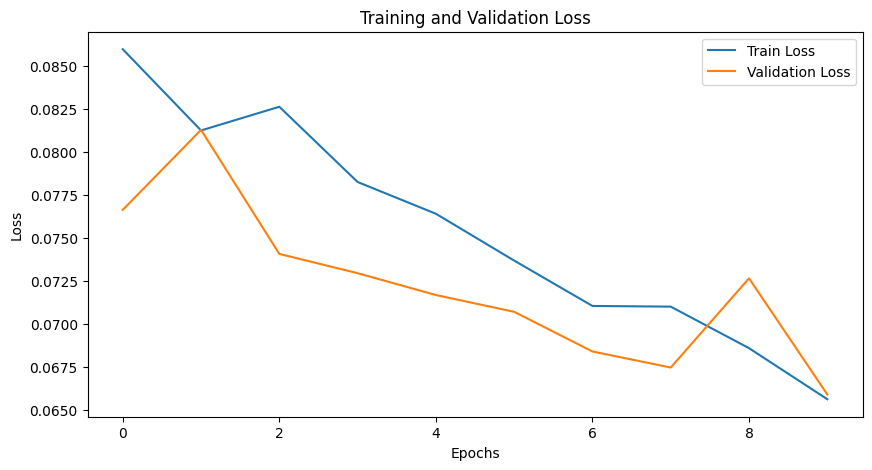

In [45]:
# Train and validate with visualization
def train_and_validate(model, train_loader, val_loader, criterion, optimizer, num_epochs=10, device='cpu'):
    train_losses, val_losses = [], []
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for images, masks in train_loader:
            images, masks = images.to(device), masks.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, masks)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        train_loss = running_loss / len(train_loader)
        val_loss, _, _ = validate_model(model, val_loader, criterion, device)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
    
    # Plot training and validation losses
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label="Train Loss")
    plt.plot(val_losses, label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss")
    plt.legend()
    plt.show()

# Split train dataset for validation
train_split, val_split = train_test_split(train_dataset, test_size=0.2, random_state=42)
train_loader = DataLoader(train_split, batch_size=8, shuffle=True)
val_loader = DataLoader(val_split, batch_size=8, shuffle=False)

# Train and validate the model
device = 'cuda' if torch.cuda.is_available() else 'cpu'
train_and_validate(model, train_loader, val_loader, criterion, optimizer, num_epochs=10, device=device)


In [16]:
# Test function
def test_model(model, test_loader, device='cpu'):
    model.eval()
    all_preds, all_masks = [], []

    with torch.no_grad():
        for images, masks in test_loader:
            images, masks = images.to(device), masks.to(device)
            
            # Forward pass
            outputs = model(images)
            preds = torch.argmax(outputs, dim=1)

            all_preds.append(preds.cpu())
            all_masks.append(masks.cpu())

    return torch.cat(all_preds), torch.cat(all_masks)

# Run test
test_preds, test_masks = test_model(model, test_loader, device=device)


RuntimeError: torch.cat(): expected a non-empty list of Tensors

In [17]:
# Visualize predictions
def visualize_predictions(images, masks, preds, num_samples=5):
    for i in range(num_samples):
        plt.figure(figsize=(12, 4))

        # Original image
        plt.subplot(1, 3, 1)
        plt.imshow(images[i, 0], cmap="gray")
        plt.title("MRI Image")
        plt.axis("off")

        # Ground truth mask
        plt.subplot(1, 3, 2)
        plt.imshow(masks[i], cmap="viridis")
        plt.title("Ground Truth")
        plt.axis("off")

        # Predicted mask
        plt.subplot(1, 3, 3)
        plt.imshow(preds[i], cmap="viridis")
        plt.title("Prediction")
        plt.axis("off")

        plt.show()

# Visualize some test samples
sample_images, sample_masks = next(iter(test_loader))
visualize_predictions(sample_images.numpy(), sample_masks.numpy(), test_preds[:5].numpy())


StopIteration: 

In [48]:
# Dice coefficient
def dice_score(preds, targets, num_classes=4):
    scores = []
    for c in range(num_classes):
        pred_class = (preds == c).float()
        target_class = (targets == c).float()

        intersection = (pred_class * target_class).sum()
        union = pred_class.sum() + target_class.sum()

        dice = (2.0 * intersection) / (union + 1e-5)
        scores.append(dice.item())

    return scores

# Calculate Dice scores
dice_scores = dice_score(test_preds, test_masks)
for i, score in enumerate(dice_scores):
    print(f"Dice Score for Class {i}: {score:.4f}")


Dice Score for Class 0: 0.9900
Dice Score for Class 1: 0.4082
Dice Score for Class 2: 0.3484
Dice Score for Class 3: 0.7044


In [ ]:
# Visualize predictions for each class
def visualize_class_predictions(images, masks, preds, num_samples=3):
    class_names = ["Background", "LV", "RV", "Myocardium"]

    for i in range(num_samples):
        plt.figure(figsize=(20, 8))

        # Original MRI Image
        plt.subplot(1, 5, 1)
        plt.imshow(images[i, 0], cmap="gray")
        plt.title("MRI Image")
        plt.axis("off")

        for c in range(1, 4):  # Class 1, 2, 3
            # Ground truth mask for the class
            plt.subplot(1, 5, c + 1)
            plt.imshow(masks[i] == c, cmap="Reds" if c == 1 else "Blues" if c == 2 else "Greens")
            plt.title(f"Ground Truth: {class_names[c]}")
            plt.axis("off")

            # Predicted mask for the class
            plt.subplot(1, 5, c + 3)
            plt.imshow(preds[i] == c, cmap="Reds" if c == 1 else "Blues" if c == 2 else "Greens")
            plt.title(f"Prediction: {class_names[c]}")
            plt.axis("off")

        plt.tight_layout()
        plt.show()

# Visualize a few samples from the test set
sample_images, sample_masks = next(iter(test_loader))
visualize_class_predictions(sample_images.numpy(), sample_masks.numpy(), test_preds[:3].numpy())


NameError: name 'test_preds' is not defined

Dice Score for Background: 0.9900
Dice Score for LV: 0.4082
Dice Score for RV: 0.3484
Dice Score for Myocardium: 0.7044


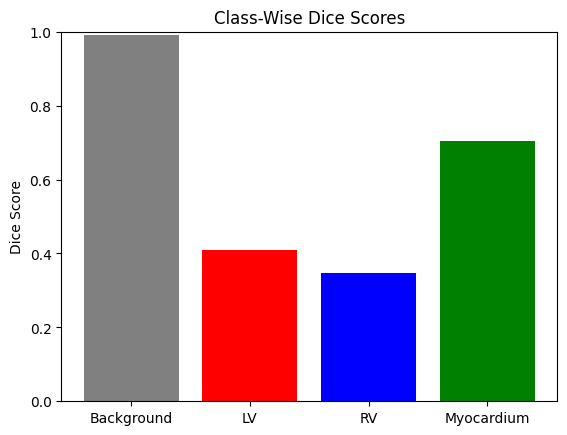

In [50]:
# Class-wise Dice scores for test set
def plot_class_dice_scores(preds, masks, num_classes=4):
    class_names = ["Background", "LV", "RV", "Myocardium"]
    scores = dice_score(preds, masks, num_classes)

    # Print and plot scores
    for i, score in enumerate(scores):
        print(f"Dice Score for {class_names[i]}: {score:.4f}")

    plt.bar(class_names, scores, color=["gray", "red", "blue", "green"])
    plt.ylabel("Dice Score")
    plt.title("Class-Wise Dice Scores")
    plt.ylim(0, 1)
    plt.show()

# Calculate and plot Dice scores
plot_class_dice_scores(test_preds, test_masks)


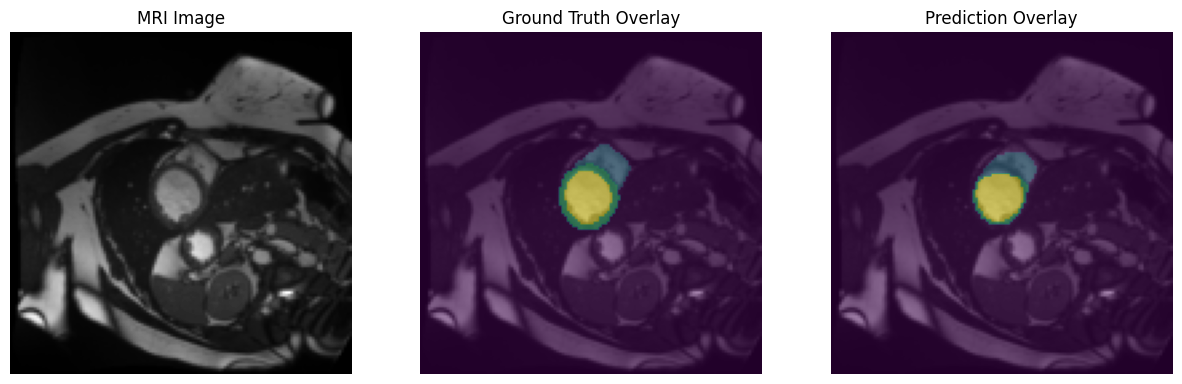

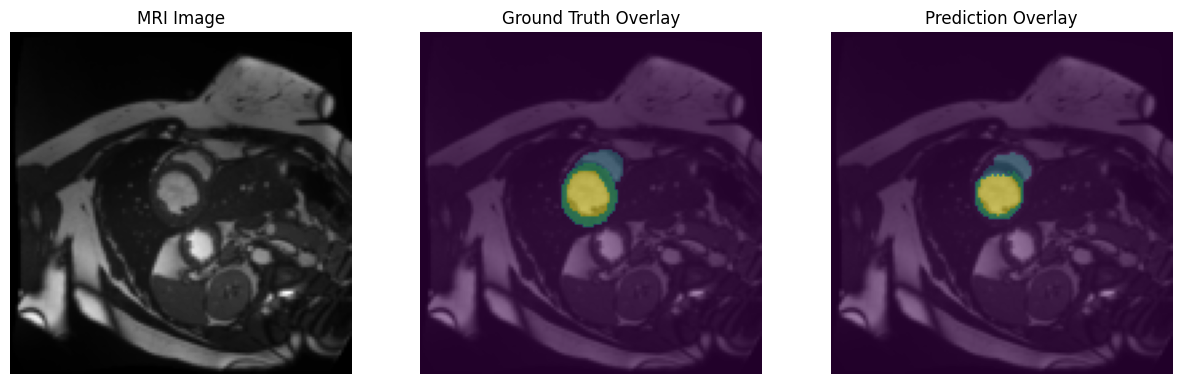

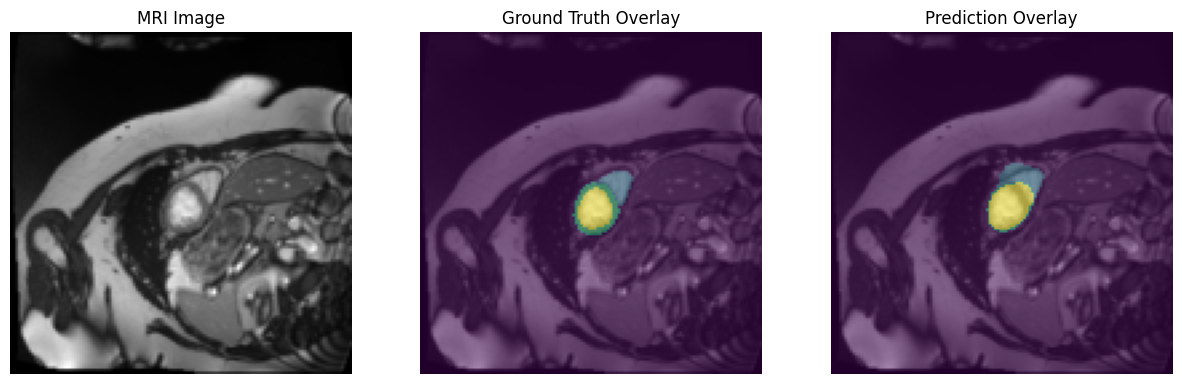

In [51]:
# Overlay predictions on MRI images
def overlay_predictions(images, masks, preds, num_samples=3):
    for i in range(num_samples):
        plt.figure(figsize=(15, 5))

        # Original MRI Image
        plt.subplot(1, 3, 1)
        plt.imshow(images[i, 0], cmap="gray")
        plt.title("MRI Image")
        plt.axis("off")

        # Ground truth overlay
        plt.subplot(1, 3, 2)
        plt.imshow(images[i, 0], cmap="gray")
        plt.imshow(masks[i], alpha=0.5, cmap="viridis")
        plt.title("Ground Truth Overlay")
        plt.axis("off")

        # Prediction overlay
        plt.subplot(1, 3, 3)
        plt.imshow(images[i, 0], cmap="gray")
        plt.imshow(preds[i], alpha=0.5, cmap="viridis")
        plt.title("Prediction Overlay")
        plt.axis("off")

        plt.show()

# Visualize overlays for test samples
overlay_predictions(sample_images.numpy(), sample_masks.numpy(), test_preds[:3].numpy())


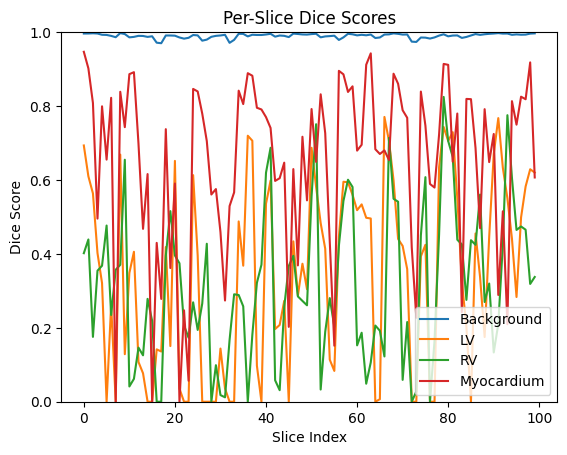

In [52]:
# Calculate per-slice Dice scores
def per_slice_dice_scores(preds, targets, num_classes=4):
    slice_scores = []
    for i in range(len(preds)):
        scores = dice_score(preds[i].unsqueeze(0), targets[i].unsqueeze(0), num_classes)
        slice_scores.append(scores)
    return np.array(slice_scores)

# Compute and plot per-slice scores
slice_scores = per_slice_dice_scores(test_preds, test_masks)

# Plot Dice scores for each class across slices
for c in range(4):  # Classes: Background, LV, RV, Myocardium
    plt.plot(slice_scores[:, c], label=f"Class {c}")
plt.xlabel("Slice Index")
plt.ylabel("Dice Score")
plt.title("Per-Slice Dice Scores")
plt.legend(["Background", "LV", "RV", "Myocardium"])
plt.ylim(0, 1)
plt.show()


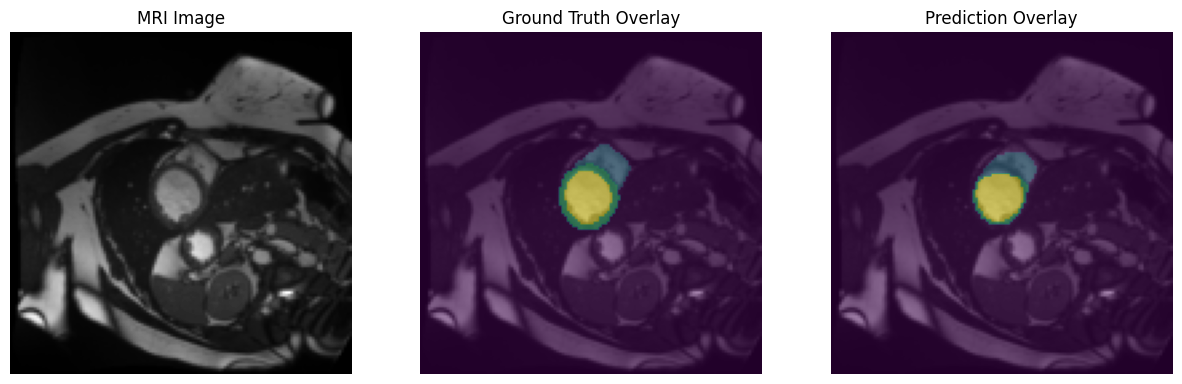

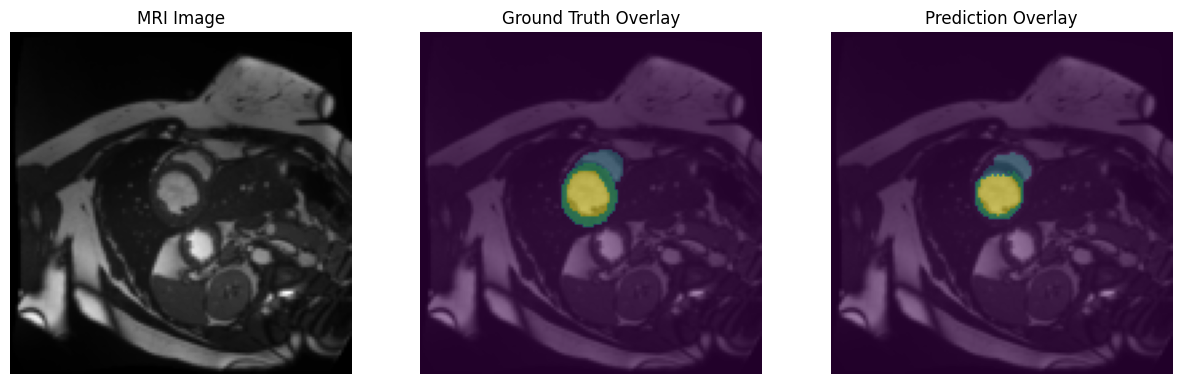

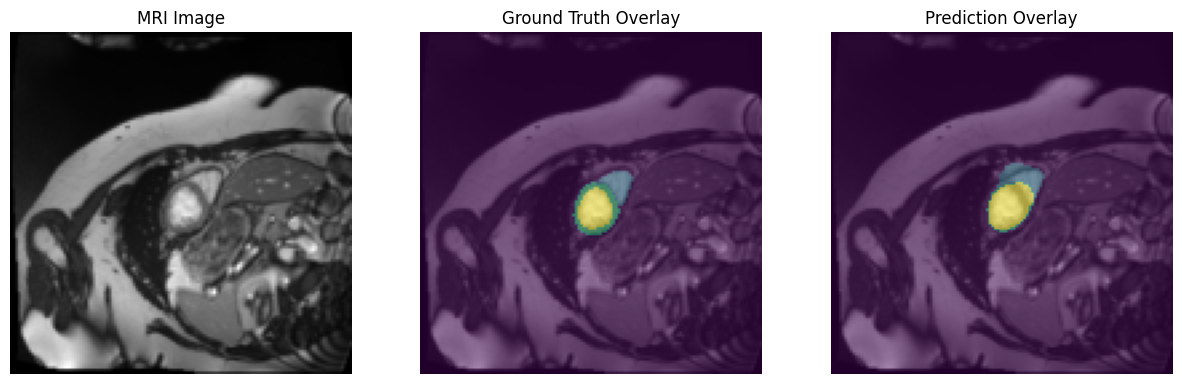

In [53]:
# Overlay predictions on MRI images
def overlay_predictions(images, masks, preds, num_samples=3):
    for i in range(num_samples):
        plt.figure(figsize=(15, 5))

        # Original MRI Image
        plt.subplot(1, 3, 1)
        plt.imshow(images[i, 0], cmap="gray")
        plt.title("MRI Image")
        plt.axis("off")

        # Ground truth overlay
        plt.subplot(1, 3, 2)
        plt.imshow(images[i, 0], cmap="gray")
        plt.imshow(masks[i], alpha=0.5, cmap="viridis")
        plt.title("Ground Truth Overlay")
        plt.axis("off")

        # Prediction overlay
        plt.subplot(1, 3, 3)
        plt.imshow(images[i, 0], cmap="gray")
        plt.imshow(preds[i], alpha=0.5, cmap="viridis")
        plt.title("Prediction Overlay")
        plt.axis("off")

        plt.show()

# Visualize overlays for test samples
overlay_predictions(sample_images.numpy(), sample_masks.numpy(), test_preds[:3].numpy())


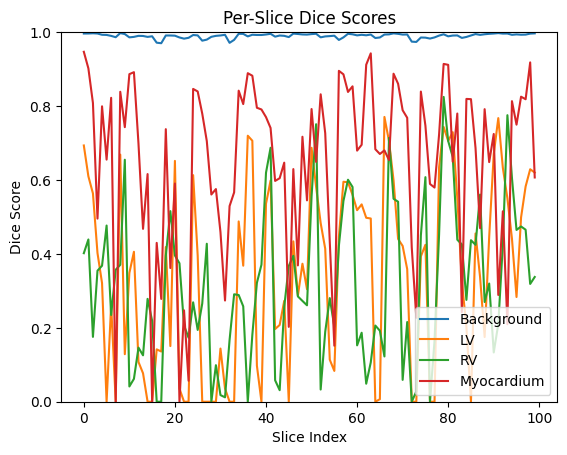

In [54]:
# Calculate per-slice Dice scores
def per_slice_dice_scores(preds, targets, num_classes=4):
    slice_scores = []
    for i in range(len(preds)):
        scores = dice_score(preds[i].unsqueeze(0), targets[i].unsqueeze(0), num_classes)
        slice_scores.append(scores)
    return np.array(slice_scores)

# Compute and plot per-slice scores
slice_scores = per_slice_dice_scores(test_preds, test_masks)

# Plot Dice scores for each class across slices
for c in range(4):  # Classes: Background, LV, RV, Myocardium
    plt.plot(slice_scores[:, c], label=f"Class {c}")
plt.xlabel("Slice Index")
plt.ylabel("Dice Score")
plt.title("Per-Slice Dice Scores")
plt.legend(["Background", "LV", "RV", "Myocardium"])
plt.ylim(0, 1)
plt.show()


In [55]:
def visualize_predictions(model, test_loader, device):
    model.eval()
    with torch.no_grad():
        for images, masks in test_loader:
            images, masks = images.to(device), masks.to(device)
            predictions = model(images)
            predicted_masks = torch.argmax(predictions, dim=1)  # Get class with highest probability

            for i in range(images.shape[0]):  # Visualize per image
                plt.figure(figsize=(15, 10))

                # Original MRI
                plt.subplot(2, 3, 1)
                plt.imshow(images[i, 0].cpu().numpy(), cmap="gray")
                plt.title("Original MRI")
                plt.axis("off")

                # Ground Truth Masks
                plt.subplot(2, 3, 2)
                plt.imshow(masks[i].cpu().numpy(), cmap="viridis")
                plt.title("Ground Truth Masks")
                plt.axis("off")

                # Predicted Masks
                plt.subplot(2, 3, 3)
                plt.imshow(predicted_masks[i].cpu().numpy(), cmap="viridis")
                plt.title("Predicted Masks")
                plt.axis("off")

                # Class-Specific Visualizations
                for j, class_name in enumerate(["LV", "RV", "Myocardium"], start=4):
                    ground_truth = (masks[i].cpu().numpy() == j).astype(float)
                    predicted = (predicted_masks[i].cpu().numpy() == j).astype(float)

                    plt.subplot(2, 3, j)
                    plt.imshow(ground_truth, alpha=0.5, cmap="Reds")
                    plt.imshow(predicted, alpha=0.5, cmap="Blues")
                    plt.title(f"{class_name} (Red=GT, Blue=Pred)")
                    plt.axis("off")

                plt.tight_layout()
                plt.show()
            break  # Show one batch


In [56]:
from sklearn.metrics import f1_score

def compute_class_wise_dice(model, test_loader, device):
    model.eval()
    dice_scores = {1: [], 2: [], 3: []}  # For LV, RV, Myocardium

    with torch.no_grad():
        for images, masks in test_loader:
            images, masks = images.to(device), masks.to(device)
            predictions = model(images)
            predicted_masks = torch.argmax(predictions, dim=1)

            for cls in dice_scores.keys():
                true_class = (masks == cls).cpu().numpy().flatten()
                pred_class = (predicted_masks == cls).cpu().numpy().flatten()
                dice_scores[cls].append(f1_score(true_class, pred_class))

    # Average Dice scores per class
    avg_dice = {cls: np.mean(scores) for cls, scores in dice_scores.items()}

    # Bar Chart
    plt.bar(["LV", "RV", "Myocardium"], avg_dice.values(), color=["red", "blue", "green"])
    plt.title("Class-Wise Dice Scores")
    plt.ylabel("Dice Score")
    plt.ylim(0, 1)
    plt.show()

    return avg_dice


In [57]:
def overlay_visualizations(model, test_loader, device):
    model.eval()
    with torch.no_grad():
        for images, masks in test_loader:
            images, masks = images.to(device), masks.to(device)
            predictions = model(images)
            predicted_masks = torch.argmax(predictions, dim=1)

            for i in range(images.shape[0]):
                plt.figure(figsize=(10, 5))
                plt.imshow(images[i, 0].cpu().numpy(), cmap="gray", alpha=0.6)
                plt.imshow(predicted_masks[i].cpu().numpy(), cmap="Blues", alpha=0.3)
                plt.imshow(masks[i].cpu().numpy(), cmap="Reds", alpha=0.3)
                plt.title("Overlay: GT (Red), Pred (Blue)")
                plt.axis("off")
                plt.show()
            break  # Show one batch


In [58]:
def per_slice_dice_scores(model, test_loader, device):
    model.eval()
    slice_scores = []

    with torch.no_grad():
        for images, masks in test_loader:
            images, masks = images.to(device), masks.to(device)
            predictions = model(images)
            predicted_masks = torch.argmax(predictions, dim=1)

            for i in range(images.shape[0]):
                true_flat = masks[i].cpu().numpy().flatten()
                pred_flat = predicted_masks[i].cpu().numpy().flatten()
                slice_scores.append(f1_score(true_flat, pred_flat))

    # Line plot
    plt.plot(slice_scores)
    plt.title("Per-Slice Dice Scores")
    plt.xlabel("Slice Index")
    plt.ylabel("Dice Score")
    plt.ylim(0, 1)
    plt.show()

    return slice_scores


In [59]:
def compute_accuracy(model, test_loader, device):
    model.eval()
    total_pixels = 0
    correct_pixels = 0

    with torch.no_grad():
        for images, masks in test_loader:
            images, masks = images.to(device), masks.to(device)
            predictions = model(images)
            predicted_masks = torch.argmax(predictions, dim=1)

            total_pixels += masks.numel()
            correct_pixels += (predicted_masks == masks).sum().item()

    accuracy = correct_pixels / total_pixels
    print(f"Overall Accuracy: {accuracy:.4f}")
    return accuracy


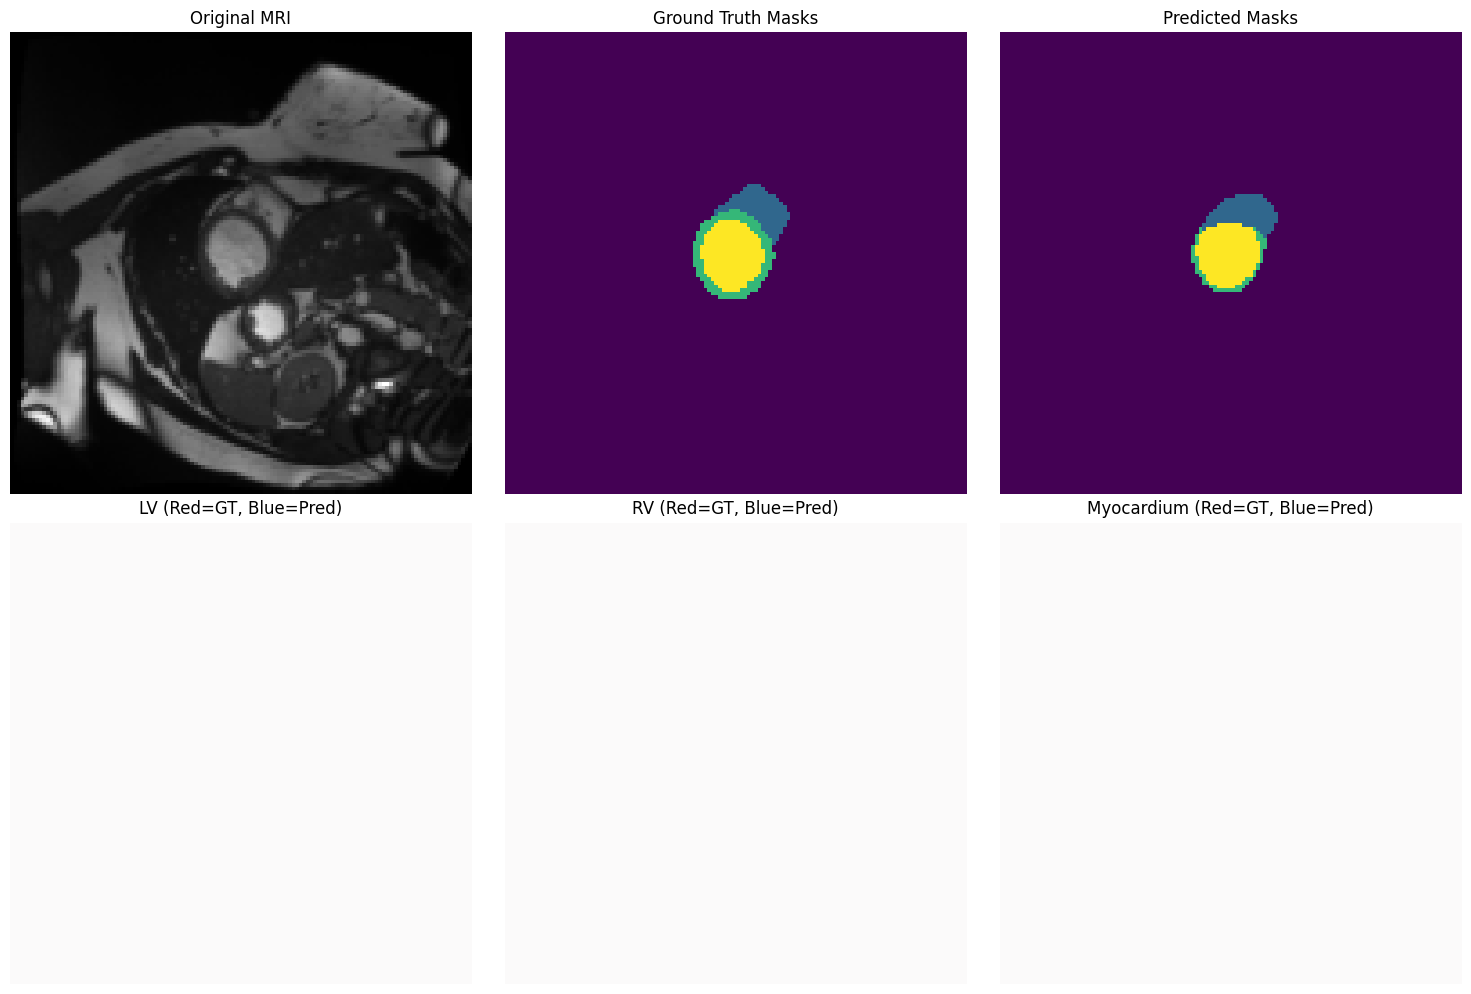

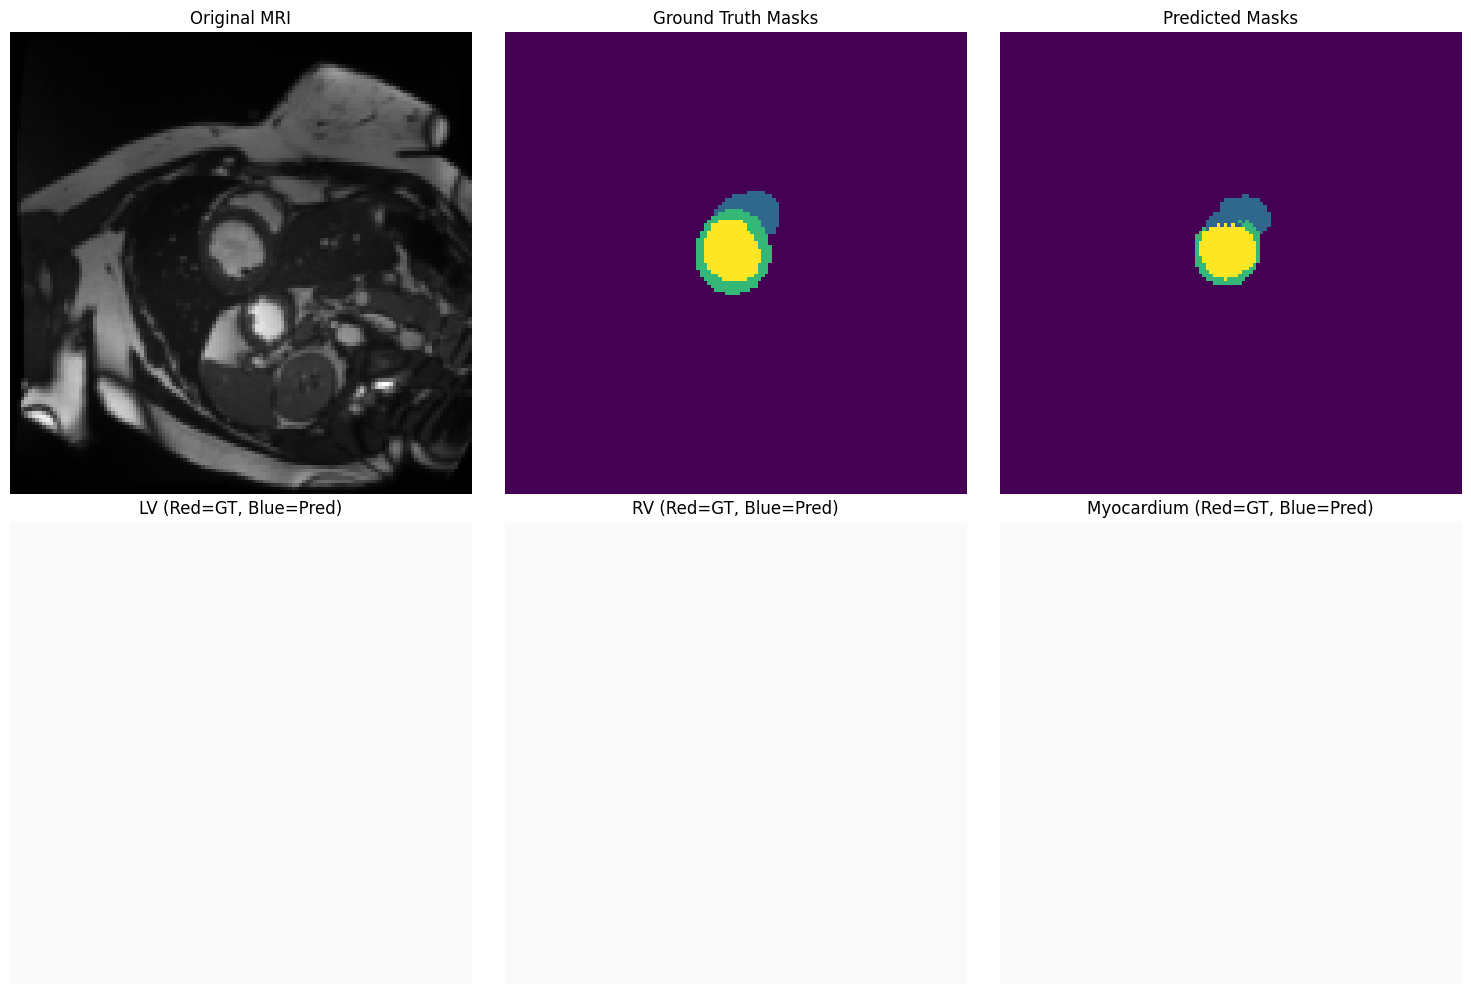

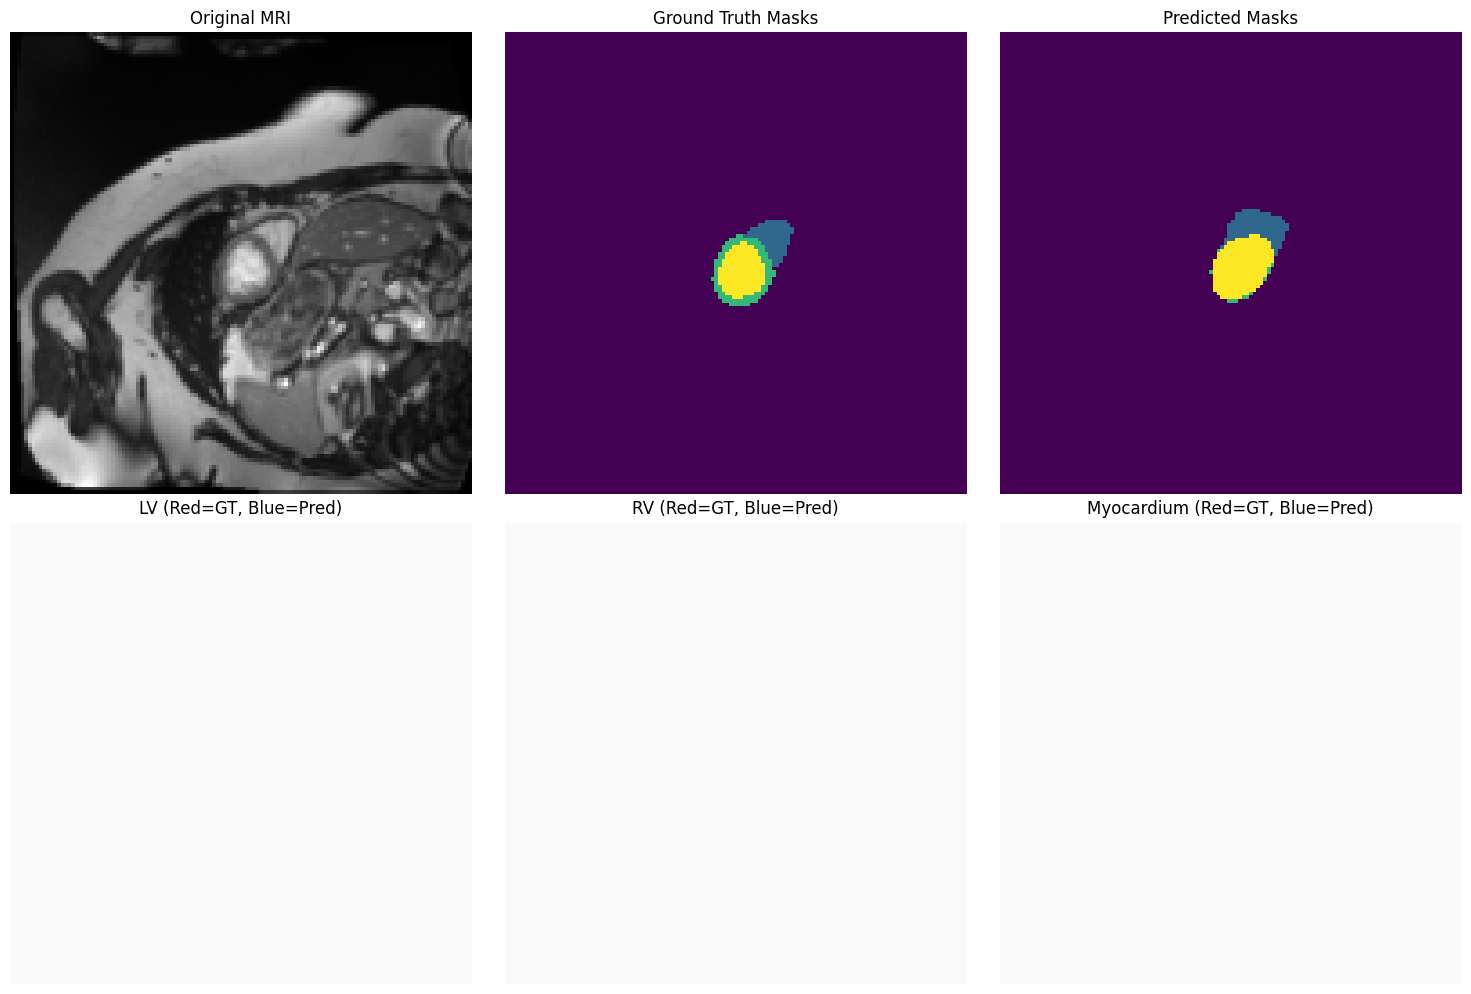

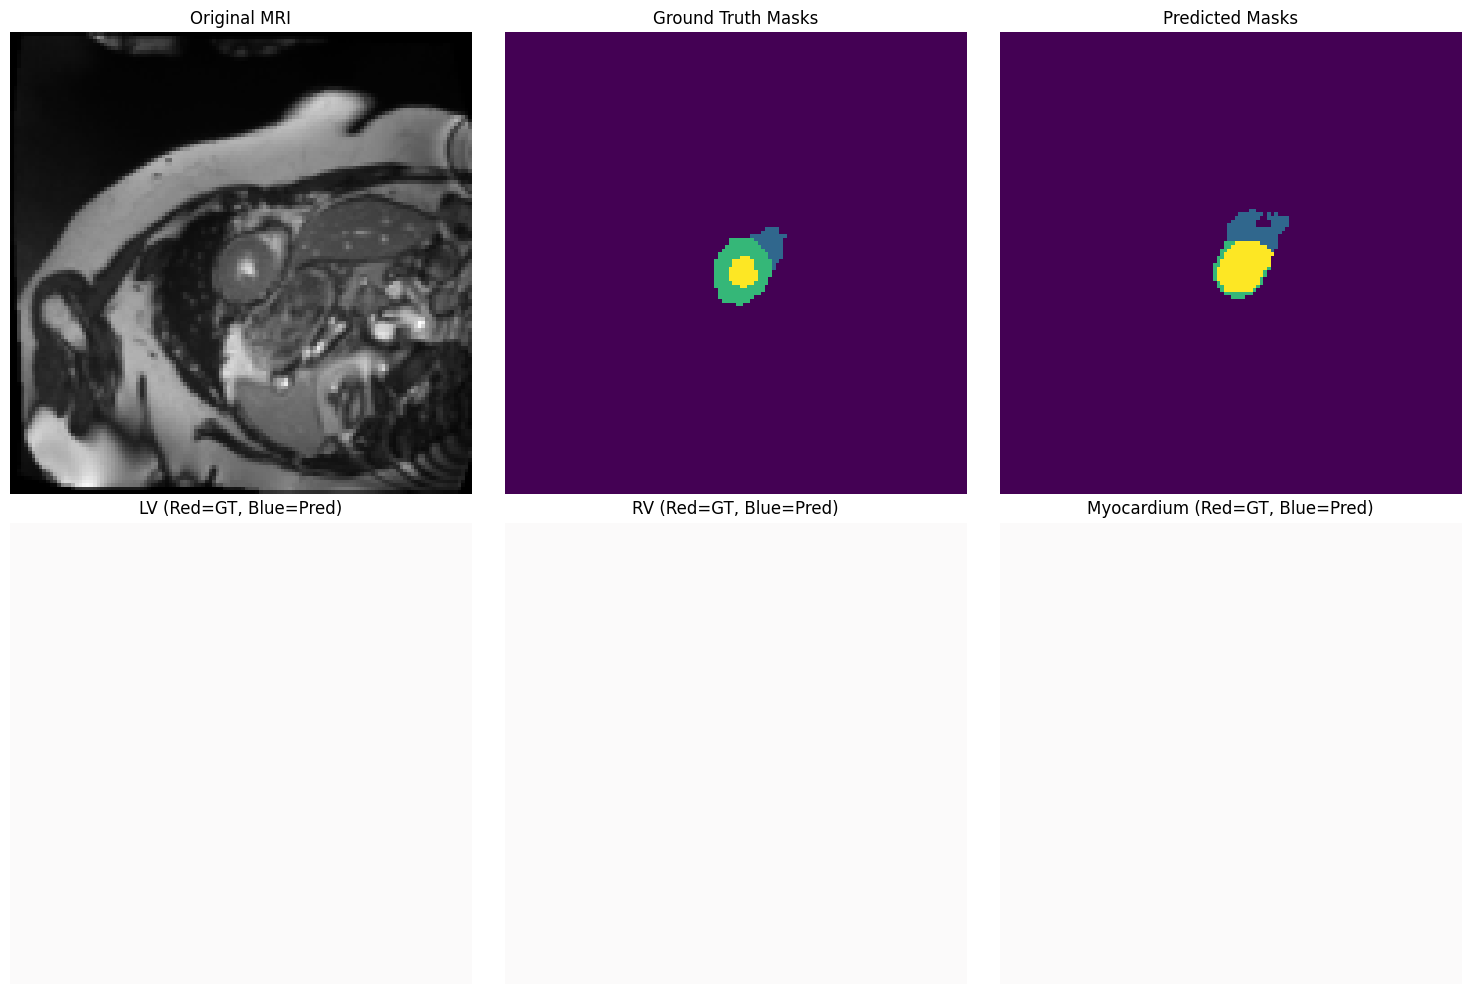

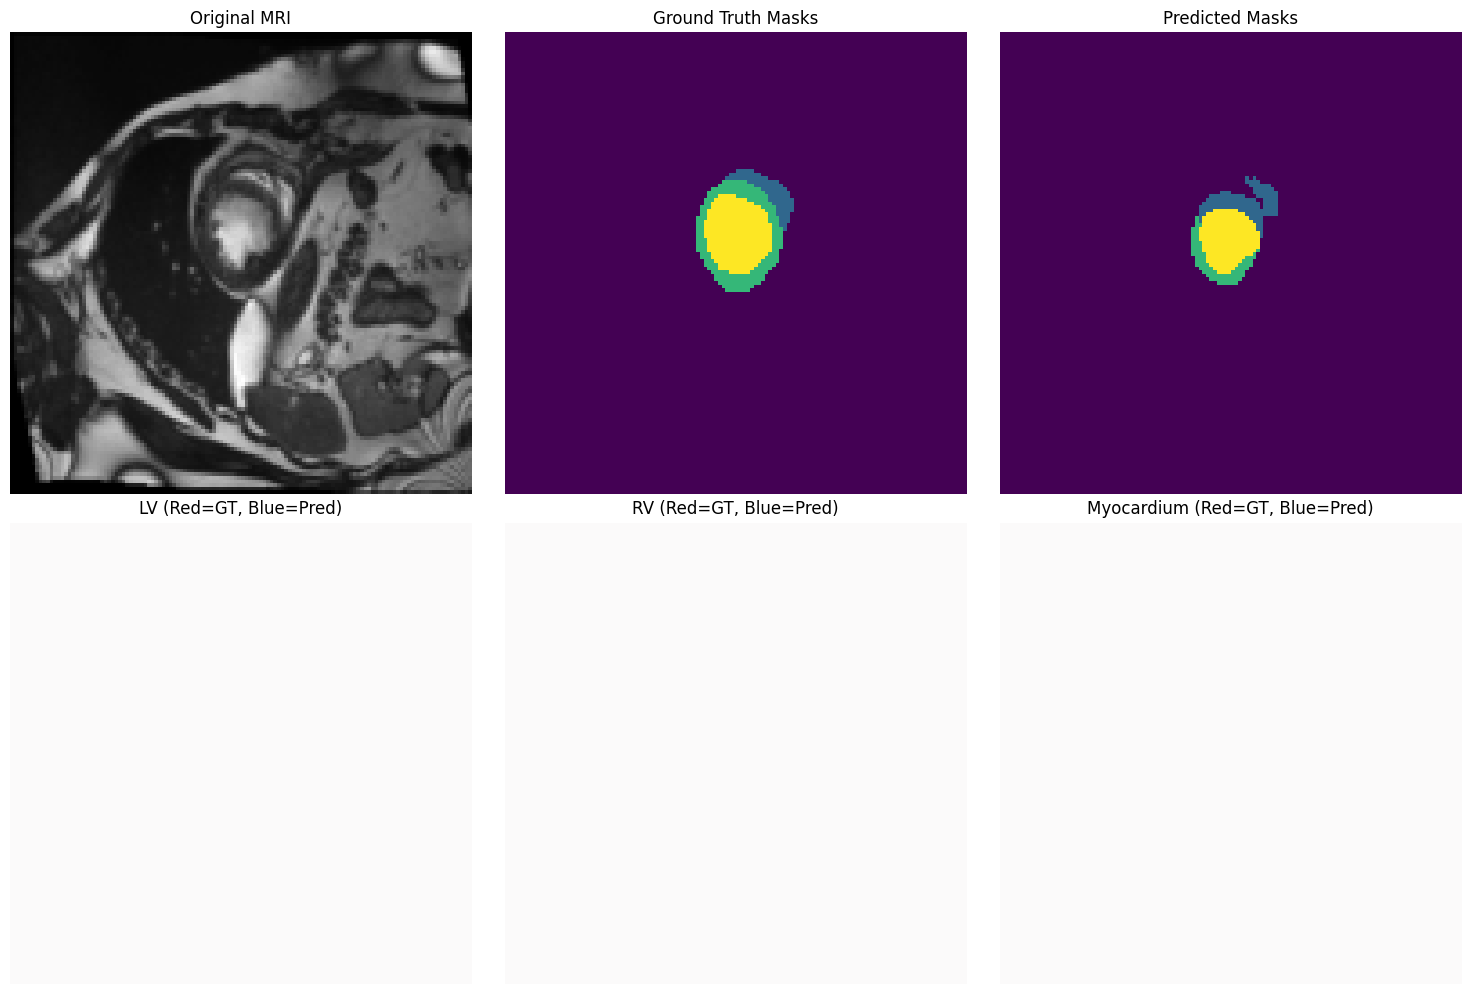

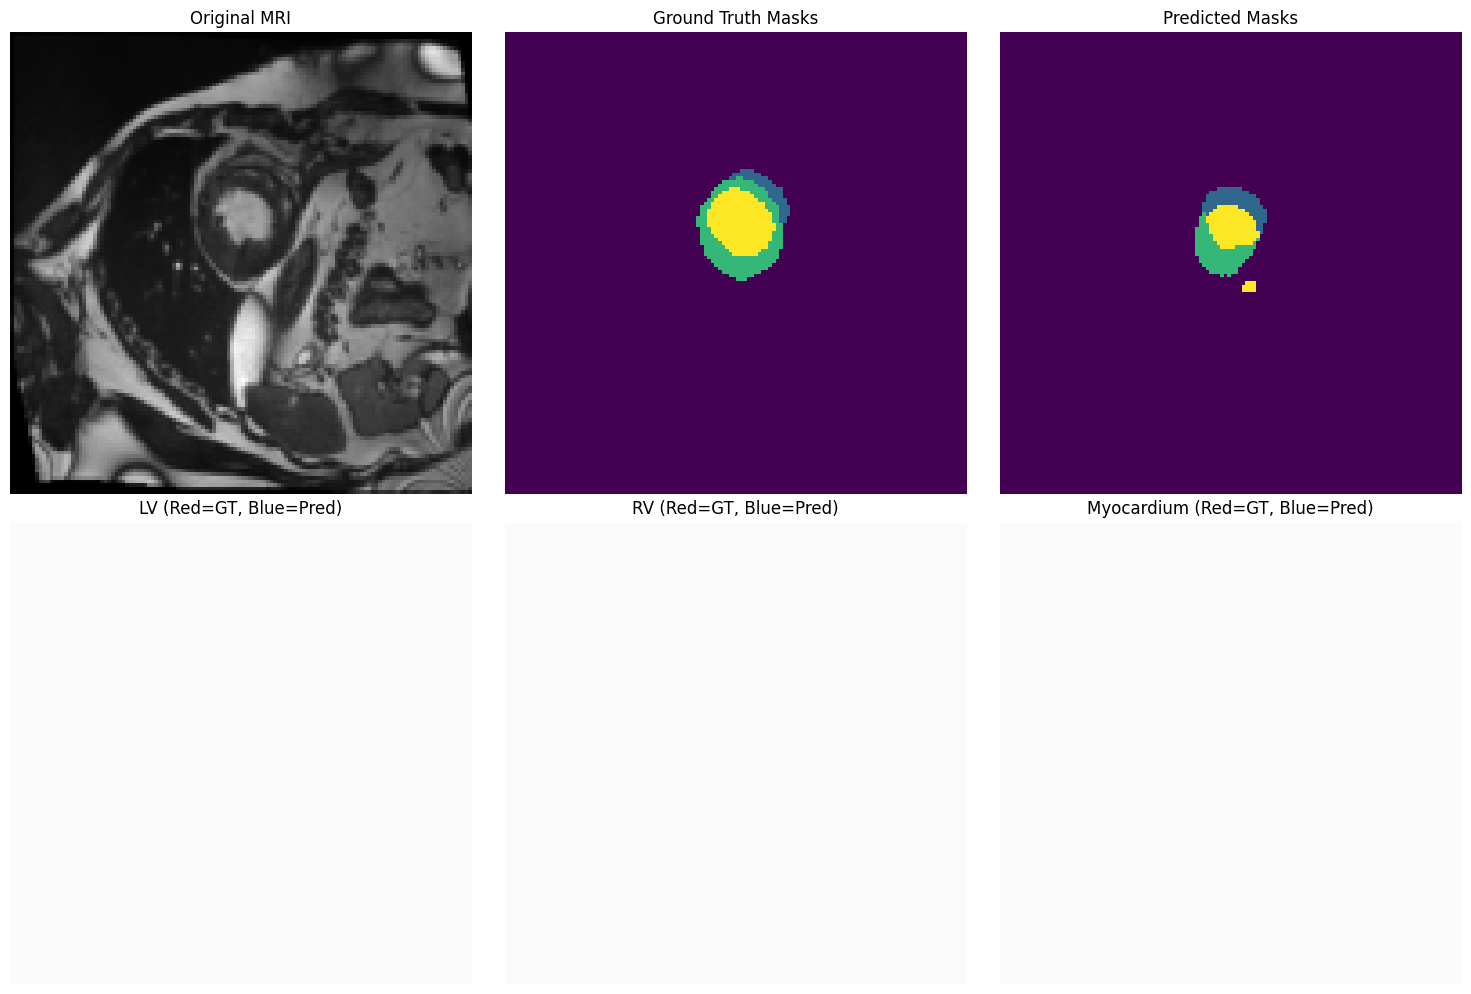

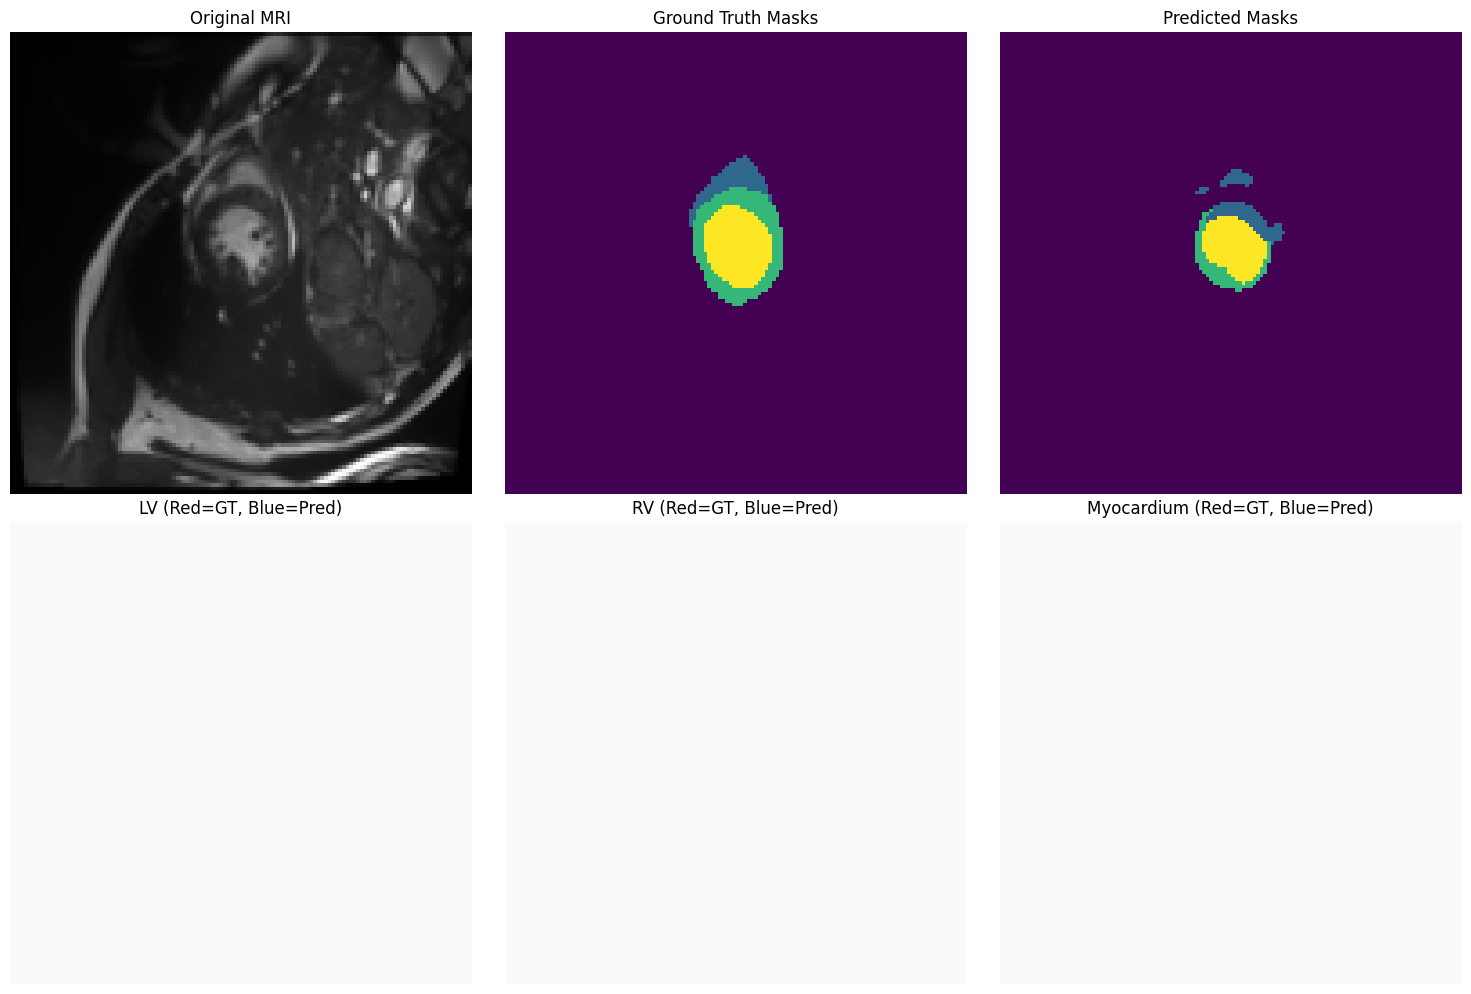

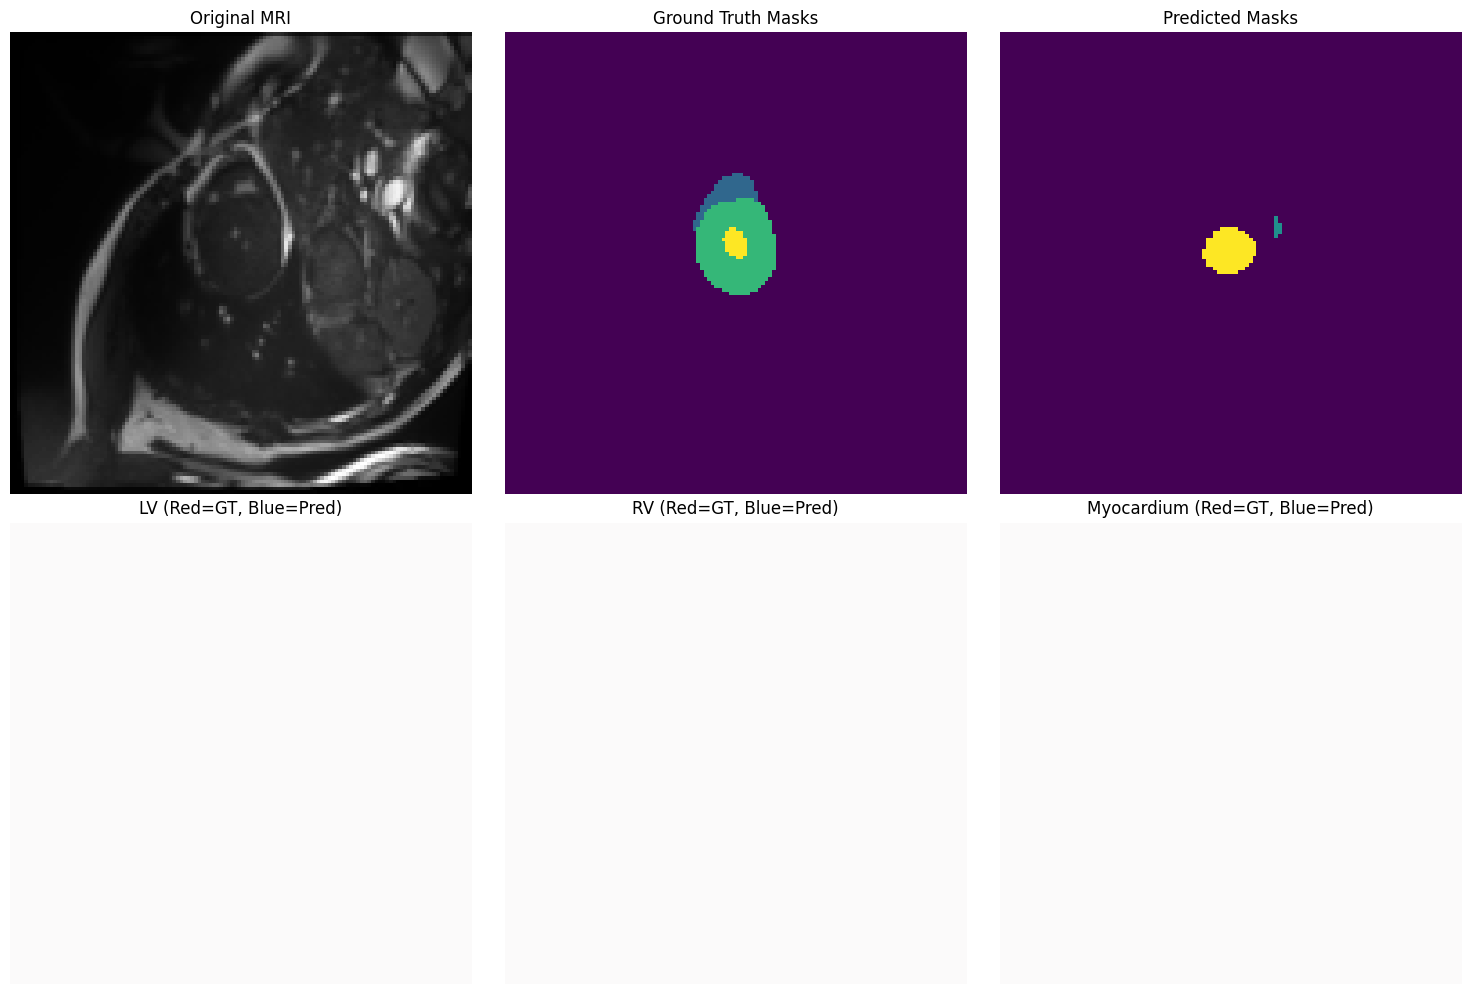

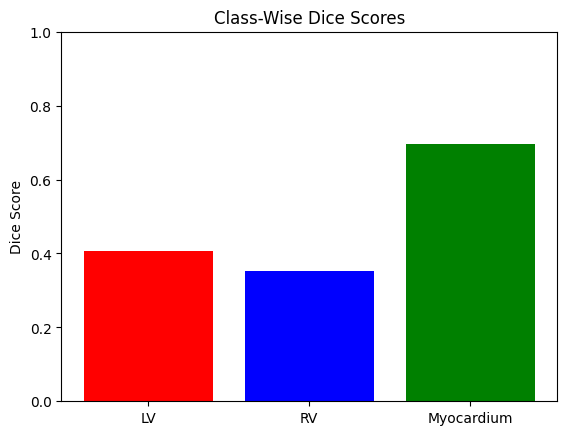

Class-Wise Dice Scores: {1: 0.4078714039056783, 2: 0.35193937689559796, 3: 0.6953384061544116}


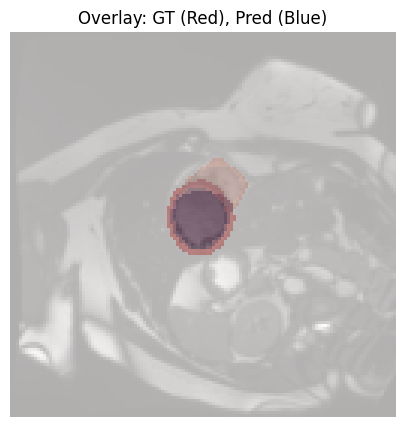

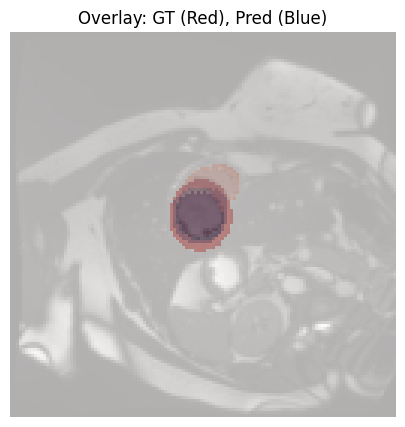

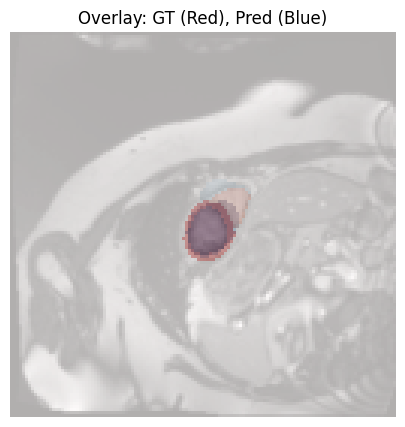

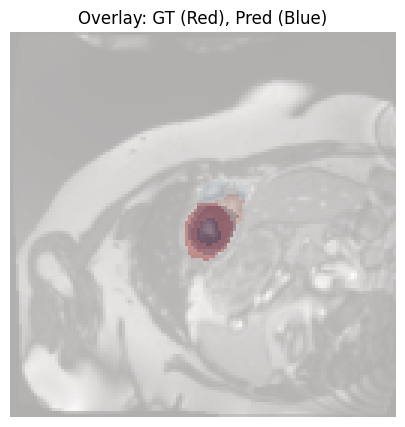

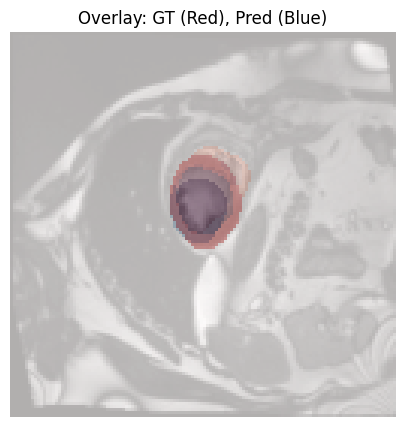

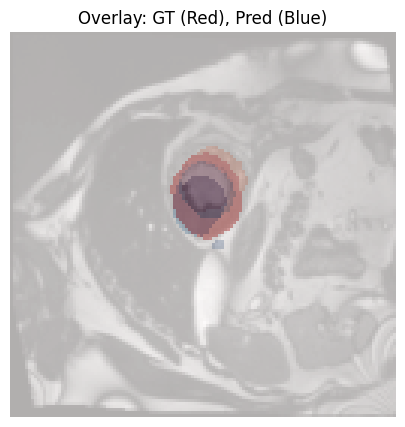

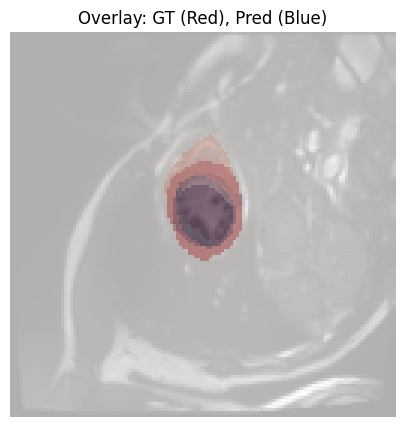

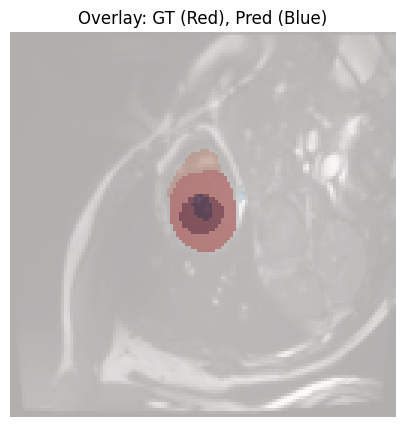

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [60]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Class-wise visualizations
visualize_predictions(model, test_loader, device)

# Class-wise Dice scores
avg_dice = compute_class_wise_dice(model, test_loader, device)
print("Class-Wise Dice Scores:", avg_dice)

# Overlay visualizations
overlay_visualizations(model, test_loader, device)

# Per-slice Dice scores
slice_scores = per_slice_dice_scores(model, test_loader, device)

# Overall accuracy
overall_accuracy = compute_accuracy(model, test_loader, device)


In [1]:
# Compute and print overall accuracy
overall_accuracy = compute_accuracy(model, test_loader, device)
print(f"Overall Pixel-Wise Accuracy: {overall_accuracy:.4%}")


NameError: name 'compute_accuracy' is not defined

In [1]:
def compute_class_wise_accuracy(model, test_loader, device):
    """
    Compute overall pixel-wise accuracy and class-wise accuracy for LV, RV, and Myocardium.
    """
    model.eval()
    total_pixels = 0
    correct_pixels = 0
    class_correct = {1: 0, 2: 0, 3: 0}  # LV, RV, Myocardium
    class_total = {1: 0, 2: 0, 3: 0}

    with torch.no_grad():
        for images, masks in test_loader:
            images, masks = images.to(device), masks.to(device)
            predictions = model(images)
            predicted_masks = torch.argmax(predictions, dim=1)

            # Overall accuracy
            total_pixels += masks.numel()
            correct_pixels += (predicted_masks == masks).sum().item()

            # Class-wise accuracy
            for cls in class_correct.keys():
                class_mask = (masks == cls)
                class_correct[cls] += ((predicted_masks == cls) & class_mask).sum().item()
                class_total[cls] += class_mask.sum().item()

    overall_accuracy = correct_pixels / total_pixels
    class_accuracy = {cls: class_correct[cls] / class_total[cls] if class_total[cls] > 0 else 0 
                      for cls in class_correct.keys()}

    print(f"Overall Pixel-Wise Accuracy: {overall_accuracy:.4%}")
    for cls, acc in class_accuracy.items():
        class_name = "LV" if cls == 1 else "RV" if cls == 2 else "Myocardium"
        print(f"Accuracy for {class_name}: {acc:.4%}")

    return overall_accuracy, class_accuracy


In [2]:
overall_accuracy, class_accuracy = compute_class_wise_accuracy(model, test_loader, device)


NameError: name 'model' is not defined

In [3]:
def compute_class_wise_iou(model, test_loader, device, num_classes=4):
    """
    Compute IoU for each class: LV, RV, and Myocardium.
    Args:
        model: Trained segmentation model.
        test_loader: DataLoader for the test dataset.
        device: Device (CPU/GPU) to run the computation.
        num_classes: Number of segmentation classes (including background).
    Returns:
        dict: IoU for each class.
    """
    model.eval()
    iou_per_class = np.zeros(num_classes)  # To store IoU for each class
    total_pixels_per_class = np.zeros(num_classes)
    intersection_per_class = np.zeros(num_classes)

    with torch.no_grad():
        for images, masks in test_loader:
            images, masks = images.to(device), masks.to(device)
            predictions = model(images)
            predicted_masks = torch.argmax(predictions, dim=1)

            for cls in range(num_classes):
                # Calculate intersection and union
                intersection = ((predicted_masks == cls) & (masks == cls)).sum().item()
                union = ((predicted_masks == cls) | (masks == cls)).sum().item()

                if union > 0:  # Avoid division by zero
                    intersection_per_class[cls] += intersection
                    total_pixels_per_class[cls] += union

    # Compute IoU for each class
    for cls in range(num_classes):
        if total_pixels_per_class[cls] > 0:
            iou_per_class[cls] = intersection_per_class[cls] / total_pixels_per_class[cls]

    class_names = {1: "LV", 2: "RV", 3: "Myocardium"}
    for cls, iou in enumerate(iou_per_class[1:], start=1):  # Skip background class (class 0)
        print(f"IoU for {class_names.get(cls, f'Class {cls}')}: {iou:.4%}")

    return iou_per_class


In [4]:
iou_per_class = compute_class_wise_iou(model, test_loader, device)


NameError: name 'model' is not defined

IOU Results:
Background: 0.9806
Left Ventricle (LV): 0.2628
Right Ventricle (RV): 0.2156
Myocardium: 0.5435


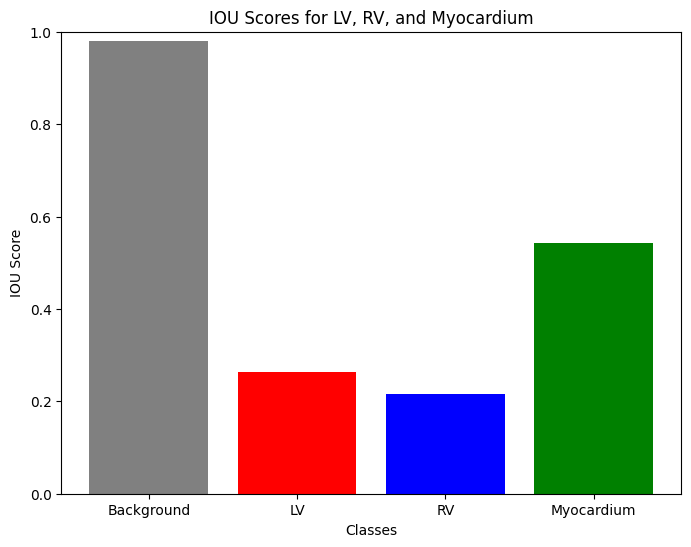

In [61]:
# Step 10: Evaluate Model on Test Data
from sklearn.metrics import jaccard_score

def evaluate_iou(model, test_loader, device, num_classes=4):
    """
    Evaluate the model to calculate IOU for each class (LV, RV, Myocardium).
    """
    model.eval()
    iou_scores = {c: [] for c in range(num_classes)}  # Store IOU per class

    with torch.no_grad():
        for images, masks in test_loader:
            images, masks = images.to(device), masks.to(device)

            # Get predictions
            outputs = model(images)
            predictions = torch.argmax(outputs, dim=1)

            # Flatten for metrics
            predictions_flat = predictions.cpu().numpy().flatten()
            masks_flat = masks.cpu().numpy().flatten()

            # Calculate IOU for each class
            for c in range(num_classes):
                iou = jaccard_score(
                    (masks_flat == c).astype(int),
                    (predictions_flat == c).astype(int),
                    average="binary",
                )
                iou_scores[c].append(iou)

    # Average IOU across all slices for each class
    avg_iou_scores = {c: np.mean(iou_scores[c]) for c in range(num_classes)}
    return avg_iou_scores

# Calculate IOU for LV, RV, and Myocardium
iou_results = evaluate_iou(model, test_loader, device)
print("IOU Results:")
print(f"Background: {iou_results[0]:.4f}")
print(f"Left Ventricle (LV): {iou_results[1]:.4f}")
print(f"Right Ventricle (RV): {iou_results[2]:.4f}")
print(f"Myocardium: {iou_results[3]:.4f}")




# Step 11: Plot IOU for LV, RV, and Myocardium
def plot_iou(iou_results):
    """
    Plot IOU scores for each class.
    """
    classes = ["Background", "LV", "RV", "Myocardium"]
    scores = [iou_results[0], iou_results[1], iou_results[2], iou_results[3]]

    plt.figure(figsize=(8, 6))
    plt.bar(classes, scores, color=["gray", "red", "blue", "green"])
    plt.ylim(0, 1)
    plt.xlabel("Classes")
    plt.ylabel("IOU Score")
    plt.title("IOU Scores for LV, RV, and Myocardium")
    plt.show()

# Plot IOU
plot_iou(iou_results)


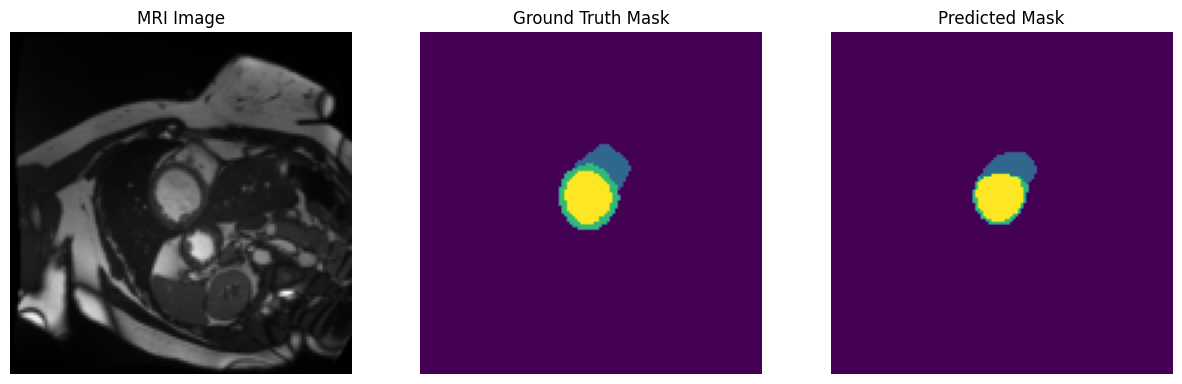

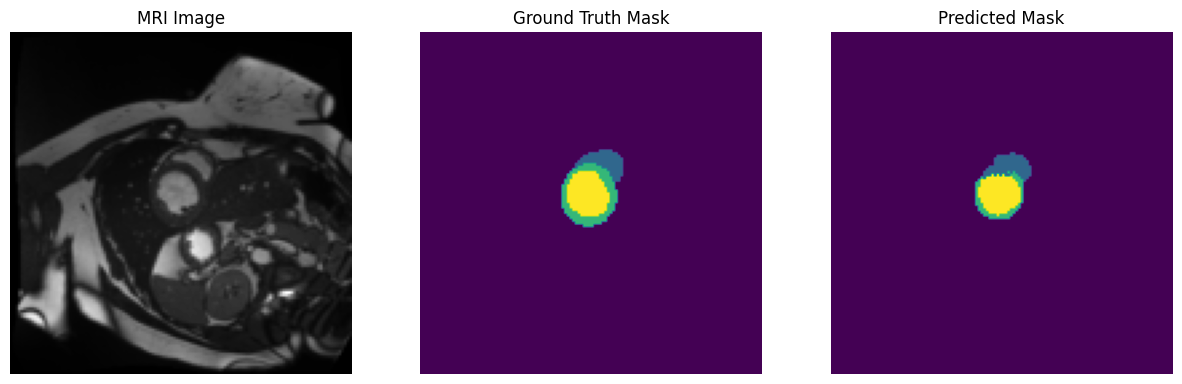

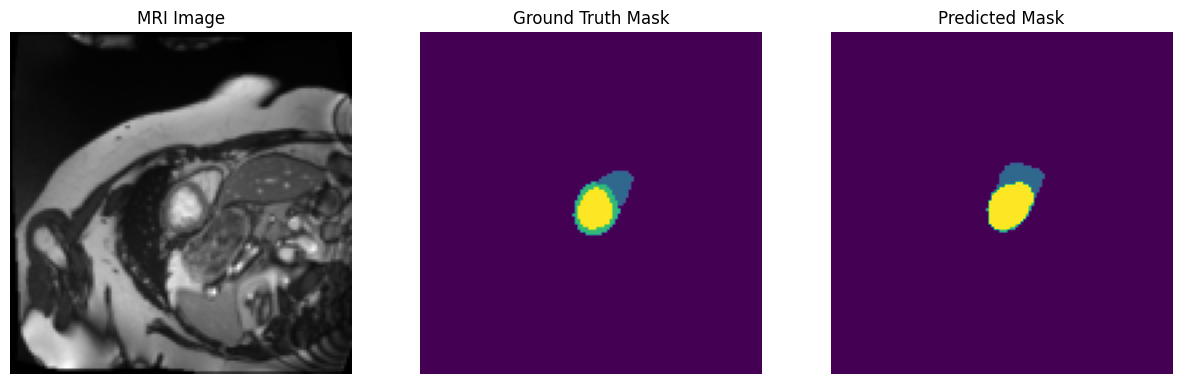

In [62]:
# Step 11: Visualize Predictions
def visualize_predictions(model, test_loader, device, num_samples=3):
    model.eval()
    samples = 0

    with torch.no_grad():
        for images, masks in test_loader:
            images, masks = images.to(device), masks.to(device)

            # Get predictions
            outputs = model(images)
            predictions = torch.argmax(outputs, dim=1)

            for i in range(images.size(0)):
                if samples >= num_samples:
                    return

                # Extract data for visualization
                image = images[i].cpu().squeeze(0).numpy()
                mask = masks[i].cpu().numpy()
                pred = predictions[i].cpu().numpy()

                plt.figure(figsize=(15, 5))

                # Original Image
                plt.subplot(1, 3, 1)
                plt.imshow(image, cmap="gray")
                plt.title("MRI Image")
                plt.axis("off")

                # Ground Truth
                plt.subplot(1, 3, 2)
                plt.imshow(mask, cmap="viridis")
                plt.title("Ground Truth Mask")
                plt.axis("off")

                # Prediction
                plt.subplot(1, 3, 3)
                plt.imshow(pred, cmap="viridis")
                plt.title("Predicted Mask")
                plt.axis("off")

                plt.show()

                samples += 1

# Visualize a few predictions
visualize_predictions(model, test_loader, device, num_samples=3)


In [63]:
# Step 12: Calculate Class-Wise Areas Across Slices
def calculate_class_areas(model, test_loader, device, num_classes=4):
    """
    Calculate areas (pixel counts) for LV, RV, and Myocardium for ground truth and predictions.
    """
    model.eval()
    areas_gt = {c: [] for c in range(num_classes)}  # Ground truth areas
    areas_pred = {c: [] for c in range(num_classes)}  # Predicted areas

    with torch.no_grad():
        for images, masks in test_loader:
            images, masks = images.to(device), masks.to(device)

            # Get predictions
            outputs = model(images)
            predictions = torch.argmax(outputs, dim=1)

            # Calculate areas for each slice
            for c in range(num_classes):
                areas_gt[c].append((masks == c).sum().item())
                areas_pred[c].append((predictions == c).sum().item())

    # Average areas across slices
    avg_areas_gt = {c: np.mean(areas_gt[c]) for c in range(num_classes)}
    avg_areas_pred = {c: np.mean(areas_pred[c]) for c in range(num_classes)}
    return areas_gt, areas_pred, avg_areas_gt, avg_areas_pred

# Calculate class-wise areas
areas_gt, areas_pred, avg_areas_gt, avg_areas_pred = calculate_class_areas(model, test_loader, device)

# Print Average Areas
print("Average Areas (Pixels):")
for c, label in enumerate(["Background", "LV", "RV", "Myocardium"]):
    print(f"{label} (Ground Truth): {avg_areas_gt[c]:.2f}")
    print(f"{label} (Prediction): {avg_areas_pred[c]:.2f}")


Average Areas (Pixels):
Background (Ground Truth): 120498.62
Background (Prediction): 122148.08
LV (Ground Truth): 1684.08
LV (Prediction): 1331.23
RV (Ground Truth): 1867.54
RV (Prediction): 666.08
Myocardium (Ground Truth): 1980.54
Myocardium (Prediction): 1885.38


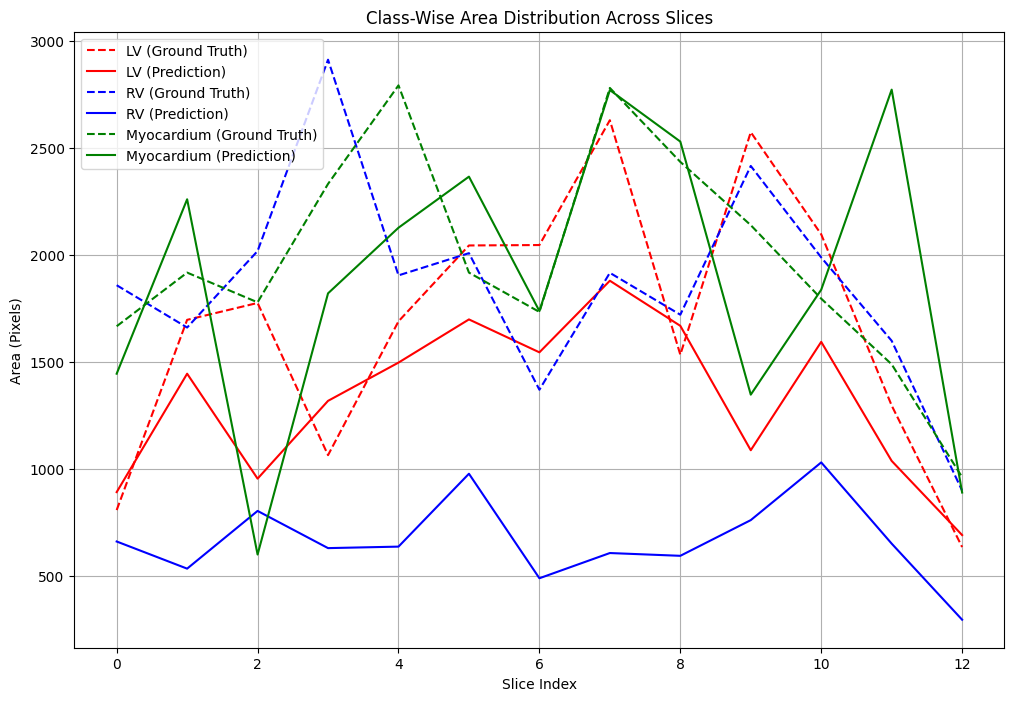

In [64]:
# Step 13: Plot Class-Wise Area Curves
def plot_class_areas(areas_gt, areas_pred):
    """
    Plot area curves for LV, RV, and Myocardium (ground truth and predictions).
    """
    classes = ["Background", "LV", "RV", "Myocardium"]
    colors = ["gray", "red", "blue", "green"]

    plt.figure(figsize=(12, 8))
    
    for c in range(1, len(classes)):  # Skip background
        plt.plot(areas_gt[c], label=f"{classes[c]} (Ground Truth)", linestyle="--", color=colors[c])
        plt.plot(areas_pred[c], label=f"{classes[c]} (Prediction)", linestyle="-", color=colors[c])

    plt.xlabel("Slice Index")
    plt.ylabel("Area (Pixels)")
    plt.title("Class-Wise Area Distribution Across Slices")
    plt.legend()
    plt.grid()
    plt.show()

# Plot area curves
plot_class_areas(areas_gt, areas_pred)


In [66]:
# aCCURACY

In [5]:
def calculate_accuracy(model, test_loader, device):
    """
    Calculate and print the overall accuracy of the model on the test dataset.
    Args:
        model: Trained PyTorch model.
        test_loader: DataLoader for the test dataset.
        device: Device to perform computation on (CPU or GPU).
    Returns:
        float: Overall pixel-wise accuracy.
    """
    model.eval()  # Set the model to evaluation mode
    total_pixels = 0
    correct_pixels = 0

    with torch.no_grad():  # Disable gradient computation
        for images, masks in test_loader:
            # Move data to the appropriate device
            images, masks = images.to(device), masks.to(device)

            # Get model predictions
            predictions = model(images)
            predicted_masks = torch.argmax(predictions, dim=1)

            # Count total and correct pixels
            total_pixels += masks.numel()
            correct_pixels += (predicted_masks == masks).sum().item()

    # Calculate accuracy
    accuracy = correct_pixels / total_pixels
    print(f"Overall Pixel-Wise Accuracy: {accuracy:.4f}")
    return accuracy


In [68]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Calculate and print accuracy
overall_accuracy = calculate_accuracy(model, test_loader, device)


Overall Pixel-Wise Accuracy: 0.9722


In [69]:
overall_accuracy

0.9721990966796875

In [70]:
from sklearn.metrics import f1_score

def compute_class_wise_dice(model, test_loader, device):
    model.eval()
    dice_scores = {1: [], 2: [], 3: []}  # For LV, RV, Myocardium

    with torch.no_grad():
        for images, masks in test_loader:
            images, masks = images.to(device), masks.to(device)
            predictions = model(images)
            predicted_masks = torch.argmax(predictions, dim=1)

            for cls in dice_scores.keys():
                true_class = (masks == cls).cpu().numpy().flatten()
                pred_class = (predicted_masks == cls).cpu().numpy().flatten()
                dice_scores[cls].append(f1_score(true_class, pred_class))

    # Average Dice scores per class
    avg_dice = {cls: np.mean(scores) for cls, scores in dice_scores.items()}

    # Bar Chart
    plt.bar(["LV", "RV", "Myocardium"], avg_dice.values(), color=["red", "blue", "green"])
    plt.title("Class-Wise Dice Scores")
    plt.ylabel("Dice Score")
    plt.ylim(0, 1)
    plt.show()

    return avg_dice


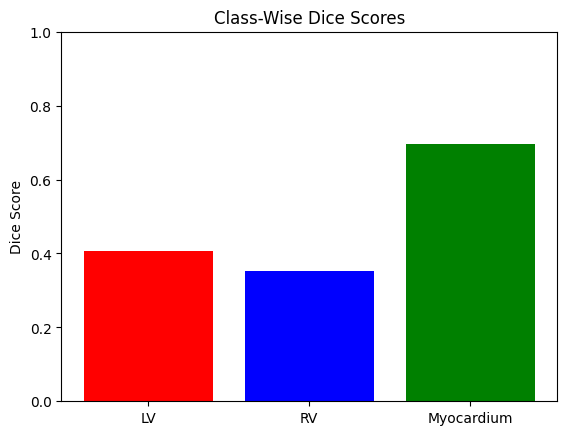

Class-Wise Dice Scores: {1: 0.4078714039056783, 2: 0.35193937689559796, 3: 0.6953384061544116}


In [71]:
avg_dice = compute_class_wise_dice(model, test_loader, device)
print("Class-Wise Dice Scores:", avg_dice)


In [72]:
def class_wise_accuracy(model, test_loader, device):
    model.eval()
    class_accuracies = {1: [], 2: [], 3: []}  # For LV, RV, Myocardium

    with torch.no_grad():
        for images, masks in test_loader:
            images, masks = images.to(device), masks.to(device)
            predictions = model(images)
            predicted_masks = torch.argmax(predictions, dim=1)

            # Calculate accuracy for each class
            for cls in class_accuracies.keys():
                true_class = (masks == cls).cpu().numpy().flatten()
                pred_class = (predicted_masks == cls).cpu().numpy().flatten()

                correct_pixels = (true_class == pred_class).sum()
                total_pixels = true_class.size

                accuracy = correct_pixels / total_pixels
                class_accuracies[cls].append(accuracy)

    # Average accuracy for each class
    avg_accuracies = {cls: np.mean(scores) for cls, scores in class_accuracies.items()}
    
    # Display accuracy for each class
    for cls, acc in avg_accuracies.items():
        if cls == 1:
            class_name = "LV"
        elif cls == 2:
            class_name = "RV"
        else:
            class_name = "Myocardium"
        print(f"Accuracy for {class_name}: {acc:.4f}")

    return avg_accuracies


In [73]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Compute and display class-wise accuracy Validation
class_accuracies = class_wise_accuracy(model, test_loader, device)


Accuracy for LV: 0.9861
Accuracy for RV: 0.9870
Accuracy for Myocardium: 0.9911


In [74]:
import torch
import numpy as np
from sklearn.metrics import f1_score

def compute_class_wise_accuracy_and_dice(model, test_loader, device):
    model.eval()
    
    # Initialize class-wise accuracy and Dice scores
    dice_scores = {1: [], 2: [], 3: []}  # For LV, RV, Myocardium
    correct_pixels = 0
    total_pixels = 0
    
    with torch.no_grad():
        for images, masks in test_loader:
            images, masks = images.to(device), masks.to(device)
            predictions = model(images)
            predicted_masks = torch.argmax(predictions, dim=1)

            for cls in dice_scores.keys():
                true_class = (masks == cls).cpu().numpy().flatten()
                pred_class = (predicted_masks == cls).cpu().numpy().flatten()
                dice_scores[cls].append(f1_score(true_class, pred_class))

            # Pixel-wise accuracy
            correct_pixels += (predicted_masks == masks).sum().item()
            total_pixels += masks.numel()

    # Calculate average Dice scores per class
    avg_dice = {cls: np.mean(scores) for cls, scores in dice_scores.items()}
    
    # Calculate overall accuracy
    accuracy = correct_pixels / total_pixels

    # Print Results
    print(f"Overall Accuracy: {accuracy:.4f}")
    print("Class-wise Dice Scores:")
    for cls, score in avg_dice.items():
        print(f"Class {cls}: {score:.4f}")

    return avg_dice, accuracy


In [75]:
# Assuming your model and test_loader are set up correctly
avg_dice, overall_accuracy = compute_class_wise_accuracy_and_dice(model, test_loader, device)


Overall Accuracy: 0.9722
Class-wise Dice Scores:
Class 1: 0.4079
Class 2: 0.3519
Class 3: 0.6953


In [1]:
import numpy as np
from sklearn.metrics import jaccard_score

def compute_class_wise_iou(model, test_loader, device):
    model.eval()
    iou_scores = {1: [], 2: [], 3: []}  # For LV, RV, Myocardium

    with torch.no_grad():
        for images, masks in test_loader:
            images, masks = images.to(device), masks.to(device)
            predictions = model(images)
            predicted_masks = torch.argmax(predictions, dim=1)

            for cls in iou_scores.keys():
                true_class = (masks == cls).cpu().numpy().flatten()
                pred_class = (predicted_masks == cls).cpu().numpy().flatten()
                iou_scores[cls].append(jaccard_score(true_class, pred_class))

    # Average IoU scores per class
    avg_iou = {cls: np.mean(scores) for cls, scores in iou_scores.items()}

    # Print IoU for each class
    print("Class-Wise IoU Scores:", avg_iou)

    # Bar Chart for IoU
    plt.bar(["LV", "RV", "Myocardium"], avg_iou.values(), color=["red", "blue", "green"])
    plt.title("Class-Wise IoU Scores")
    plt.ylabel("IoU Score")
    plt.ylim(0, 1)
    plt.show()

    return avg_iou
